In [519]:
import numpy as np 

import pandas as pd 

pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt

import datetime as dt 

from  sklearn.preprocessing import StandardScaler 

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from mlxtend.frequent_patterns import apriori , association_rules

from imblearn.over_sampling import SMOTE

from  sklearn import metrics

import operator 

import seaborn as sns

from operator import attrgetter

In [520]:
## Importing of data : 

cust_demo= pd.read_excel(r"C:\Users\ACER\Downloads\ML assingment\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\CustomersData.xlsx")
sales = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\Online_Sales.csv")
discount = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\Discount_Coupon.csv")
tax= pd.read_excel(r"C:\Users\ACER\Downloads\ML assingment\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\Tax_amount.xlsx")
marketing_spend = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\14. Capstone Case Study - Finding-Marketing-Insights\Datasets\Marketing_Spend.csv")

In [521]:
## Check if data is imported correctly : 
cust_demo

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [522]:
discount

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [523]:
tax

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [524]:
marketing_spend

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


## Doing some basic DATA Check to understand the DATA  : 

In [525]:
cust_demo.info()
## So all data type are correct of the META DATA and also , customer ID is unique variable and gender is an nominal categorical
## Variable.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [526]:
## one issue is in the name of variables all are haveing 1st capital letter , so just changing it to lower case.

cust_demo.rename({"CustomerID":"customer_id", "Gender":"gender", "Location":"location", "Tenure_Months":"cust_tenure_months"},axis=1,inplace=True)

In [527]:
cust_demo

,customer_id,gender,location,cust_tenure_months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [528]:
sales.info()

# As we can see the Transaction_data is not in data-time format , we need to change it. 
## and also the name of variables all are haveing 1st capital letter , so just changing it to lower case.

sales.rename({"Coupon_Status":"coupon_status", "Quantity":"quantity","Avg_Price":"avg_price","Delivery_Charges":"delivery_charges" , "Product_Description":"product_description", "Product_Category":"product_category", "CustomerID":"customer_id", "Transaction_ID":"transaction_id", "Transaction_Date":"transaction_date", "Product_SKU":"product_sku"},axis = 1, inplace=True)

sales["transation_date_new"]= pd.to_datetime(sales.transaction_date, format="%Y%m%d")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [529]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          52924 non-null  int64         
 1   transaction_id       52924 non-null  int64         
 2   transaction_date     52924 non-null  int64         
 3   product_sku          52924 non-null  object        
 4   product_description  52924 non-null  object        
 5   product_category     52924 non-null  object        
 6   quantity             52924 non-null  int64         
 7   avg_price            52924 non-null  float64       
 8   delivery_charges     52924 non-null  float64       
 9   coupon_status        52924 non-null  object        
 10  transation_date_new  52924 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 4.4+ MB


In [530]:
## Droping the variable transaction_date as dreived variable will be use in place of it : 

sales.drop("transaction_date", axis=1, inplace=True)

In [531]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          52924 non-null  int64         
 1   transaction_id       52924 non-null  int64         
 2   product_sku          52924 non-null  object        
 3   product_description  52924 non-null  object        
 4   product_category     52924 non-null  object        
 5   quantity             52924 non-null  int64         
 6   avg_price            52924 non-null  float64       
 7   delivery_charges     52924 non-null  float64       
 8   coupon_status        52924 non-null  object        
 9   transation_date_new  52924 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [532]:
sales= sales[['transation_date_new','customer_id', 'transaction_id', 'product_sku', 'product_description',
       'product_category', 'quantity', 'avg_price', 'delivery_charges',
       'coupon_status']]

In [533]:
sales.set_index("transation_date_new", inplace=True)

In [534]:
sales.head(10)

,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status
transation_date_new,,,,,,,,,
2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2019-01-01,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2019-01-01,17850,16681,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
2019-01-01,17850,16682,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
2019-01-01,17850,16682,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
2019-01-01,17850,16682,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.50,Used
2019-01-01,17850,16682,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.50,Not Used
2019-01-01,17850,16682,GGOEGDHG014499,Google Infuser-Top Water Bottle,Drinkware,15,10.31,6.50,Clicked
2019-01-01,17850,16682,GGOEGDWC020199,Engraved Ceramic Google Mug,Drinkware,5,9.27,6.50,Used


In [535]:
# renaming hte variable : 
discount.rename({"Month":"month","Product_Category":"product_category","Coupon_Code":"coupon_code","Discount_pct":"discount_pct"},axis=1, inplace=True)


In [536]:
discount

,month,product_category,coupon_code,discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [537]:
sales

,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status
transation_date_new,,,,,,,,,
2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2019-01-01,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2019-01-01,17850,16681,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
2019-01-01,17850,16682,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
2019-01-01,17850,16682,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
2019-12-31,14410,48493,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
2019-12-31,14410,48494,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
2019-12-31,14410,48495,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used


In [538]:
## we need to derived month variable in sales to concat : 

sales['month_n'] = sales.index.month

In [539]:
sales['transation_day'] = sales.index.day

sales['transation_year'] = sales.index.year

In [540]:
sales['month_name'] = sales.index.month_name()

In [541]:
sales["weekday"]= sales.index.weekday

In [542]:
sales["weekday"] = np.where(sales.weekday==0,"Monday",np.where(sales.weekday==1,"Tuesday",np.where(sales.weekday==2,"Wednesday",np.where(sales.weekday==3,"Thursday",np.where(sales.weekday==4,"Friday",np.where(sales.weekday==5,"Saturday","Sunday"))))))

In [543]:
sales

,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month_n,transation_day,transation_year,month_name,weekday
transation_date_new,,,,,,,,,,,,,,
2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,1,2019,January,Tuesday
2019-01-01,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,1,2019,January,Tuesday
2019-01-01,17850,16681,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,1,1,2019,January,Tuesday
2019-01-01,17850,16682,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,1,1,2019,January,Tuesday
2019-01-01,17850,16682,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,1,1,2019,January,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,14410,48493,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,12,31,2019,December,Tuesday
2019-12-31,14410,48494,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,12,31,2019,December,Tuesday
2019-12-31,14410,48495,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,12,31,2019,December,Tuesday


In [544]:
sales.reset_index(inplace=True)

In [545]:
sales["month"]= np.where(sales.month_n==1,"Jan", np.where(sales.month_n==2,"Feb",np.where(sales.month_n==3,"Mar",np.where(sales.month_n==4,"Apr",np.where(sales.month_n==5,"May",np.where(sales.month_n==6,"Jun", np.where(sales.month_n==7,"Jul",np.where(sales.month_n==8,"Aug",np.where(sales.month_n==9,"Sep", np.where(sales.month_n==10,"Oct", np.where(sales.month_n==11,"Nov","Dec")))))))))))

In [546]:
sales

,transation_date_new,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month_n,transation_day,transation_year,month_name,weekday,month
0,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,1,2019,January,Tuesday,Jan
1,2019-01-01,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,1,2019,January,Tuesday,Jan
2,2019-01-01,17850,16681,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,1,1,2019,January,Tuesday,Jan
3,2019-01-01,17850,16682,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,1,1,2019,January,Tuesday,Jan
4,2019-01-01,17850,16682,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,1,1,2019,January,Tuesday,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,2019-12-31,14410,48493,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,12,31,2019,December,Tuesday,Dec
52920,2019-12-31,14410,48494,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,12,31,2019,December,Tuesday,Dec
52921,2019-12-31,14410,48495,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,12,31,2019,December,Tuesday,Dec
52922,2019-12-31,14600,48496,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,12,31,2019,December,Tuesday,Dec


In [547]:
## Rename the columns : 
tax.rename({"Product_Category":"product_category", "GST":"gst"}, axis=1, inplace=True)

In [548]:
tax.product_category.count()

20

In [549]:
sales.product_category.value_counts().count()

20

In [550]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_category  20 non-null     object 
 1   gst               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [551]:
## Rename the variable names : 

marketing_spend

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


In [552]:
marketing_spend.rename({"Date":"date", "Offline_Spend":"offline_spend", "Online_Spend":"online_spend"},axis=1, inplace=True)

In [553]:
marketing_spend

,date,offline_spend,online_spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


In [554]:
## changeing Data type of date variable : 

marketing_spend["new_date"]= pd.to_datetime(marketing_spend.date)

In [555]:
marketing_spend.drop("date",axis=1, inplace=True)

In [556]:
marketing_spend = marketing_spend[['new_date', 'offline_spend', 'online_spend']]

In [557]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   new_date       365 non-null    datetime64[ns]
 1   offline_spend  365 non-null    int64         
 2   online_spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [558]:
## Merge the data to get a final data : 

In [559]:
a = pd.merge(sales, cust_demo, how="inner", on="customer_id")
a.head(2)

,transation_date_new,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month_n,transation_day,transation_year,month_name,weekday,month,gender,location,cust_tenure_months
0,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,1,2019,January,Tuesday,Jan,M,Chicago,12
1,2019-01-01,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,1,2019,January,Tuesday,Jan,M,Chicago,12


In [560]:
a

,transation_date_new,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month_n,transation_day,transation_year,month_name,weekday,month,gender,location,cust_tenure_months
0,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,1,2019,January,Tuesday,Jan,M,Chicago,12
1,2019-01-01,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,1,1,2019,January,Tuesday,Jan,M,Chicago,12
2,2019-01-01,17850,16681,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,1,1,2019,January,Tuesday,Jan,M,Chicago,12
3,2019-01-01,17850,16682,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,1,1,2019,January,Tuesday,Jan,M,Chicago,12
4,2019-01-01,17850,16682,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,1,1,2019,January,Tuesday,Jan,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,2019-12-31,14410,48493,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,12,31,2019,December,Tuesday,Dec,F,New York,45
52920,2019-12-31,14410,48494,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,12,31,2019,December,Tuesday,Dec,F,New York,45
52921,2019-12-31,14410,48495,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,12,31,2019,December,Tuesday,Dec,F,New York,45
52922,2019-12-31,14600,48496,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,12,31,2019,December,Tuesday,Dec,F,California,7


In [561]:
discount.head(2)

,month,product_category,coupon_code,discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20


In [562]:
b = pd.merge(a , discount , how="left", on= ["month","product_category"])
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transation_date_new  52924 non-null  datetime64[ns]
 1   customer_id          52924 non-null  int64         
 2   transaction_id       52924 non-null  int64         
 3   product_sku          52924 non-null  object        
 4   product_description  52924 non-null  object        
 5   product_category     52924 non-null  object        
 6   quantity             52924 non-null  int64         
 7   avg_price            52924 non-null  float64       
 8   delivery_charges     52924 non-null  float64       
 9   coupon_status        52924 non-null  object        
 10  month_n              52924 non-null  int64         
 11  transation_day       52924 non-null  int64         
 12  transation_year      52924 non-null  int64         
 13  month_name           52924 non-

In [563]:
b

,transation_date_new,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,...,transation_day,transation_year,month_name,weekday,month,gender,location,cust_tenure_months,coupon_code,discount_pct
0,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,2019,January,Tuesday,Jan,M,Chicago,12,ELEC10,10.00
1,2019-01-01,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,2019,January,Tuesday,Jan,M,Chicago,12,ELEC10,10.00
2,2019-01-01,17850,16681,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,1,2019,January,Tuesday,Jan,M,Chicago,12,OFF10,10.00
3,2019-01-01,17850,16682,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,1,2019,January,Tuesday,Jan,M,Chicago,12,SALE10,10.00
4,2019-01-01,17850,16682,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,1,2019,January,Tuesday,Jan,M,Chicago,12,AIO10,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,2019-12-31,14410,48493,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,31,2019,December,Tuesday,Dec,F,New York,45,ELEC30,30.00
52920,2019-12-31,14410,48494,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,31,2019,December,Tuesday,Dec,F,New York,45,SALE30,30.00
52921,2019-12-31,14410,48495,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,31,2019,December,Tuesday,Dec,F,New York,45,ELEC30,30.00
52922,2019-12-31,14600,48496,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,31,2019,December,Tuesday,Dec,F,California,7,ELEC30,30.00


In [564]:
c = pd.merge(b,tax, how= "inner", on="product_category" )

In [565]:
c.rename({"transation_date_new":"new_date"},axis=1 , inplace=True)

In [566]:
final_data  = pd.merge(c,marketing_spend, how="inner", on="new_date")

In [567]:
final_data.drop("month", axis=1, inplace=True)

## Doing check on final DATA :

In [568]:
final_data.head(2)


,new_date,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,...,month_name,weekday,gender,location,cust_tenure_months,coupon_code,discount_pct,gst,offline_spend,online_spend
0,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,January,Tuesday,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50
1,2019-01-01,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,January,Tuesday,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50


In [569]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   new_date             52924 non-null  datetime64[ns]
 1   customer_id          52924 non-null  int64         
 2   transaction_id       52924 non-null  int64         
 3   product_sku          52924 non-null  object        
 4   product_description  52924 non-null  object        
 5   product_category     52924 non-null  object        
 6   quantity             52924 non-null  int64         
 7   avg_price            52924 non-null  float64       
 8   delivery_charges     52924 non-null  float64       
 9   coupon_status        52924 non-null  object        
 10  month_n              52924 non-null  int64         
 11  transation_day       52924 non-null  int64         
 12  transation_year      52924 non-null  int64         
 13  month_name           52924 non-

In [570]:
sales.product_category.value_counts().count()

20

In [571]:
discount.product_category.value_counts().count()

17

In [572]:
## There is a difference in product category between sales and discount data : 
dis_p = (discount.product_category.value_counts().index)
sales.product_category.value_counts().index.difference(dis_p)

Index(['Backpacks', 'Fun', 'Google', 'More Bags'], dtype='object')

In [573]:
print(sorted(dis_p))

['Accessories', 'Android', 'Apparel', 'Bags', 'Bottles', 'Drinkware', 'Gift Cards', 'Headgear', 'Housewares', 'Lifestyle', 'Nest', 'Nest-Canada', 'Nest-USA', 'Notebooks', 'Notebooks & Journals', 'Office', 'Waze']


In [574]:
print(sorted(sales.product_category.value_counts().index))

['Accessories', 'Android', 'Apparel', 'Backpacks', 'Bags', 'Bottles', 'Drinkware', 'Fun', 'Gift Cards', 'Google', 'Headgear', 'Housewares', 'Lifestyle', 'More Bags', 'Nest', 'Nest-Canada', 'Nest-USA', 'Notebooks & Journals', 'Office', 'Waze']


## So as we can see from above data that there are some products ('Backpacks', 'Fun', 'Google', 'More Bags') that didn't have any discount offer and also we can see that there is no sales of a product category name 'Notebooks' in sales transation. 

## Treating missing : 
### So, as we can see the missing are for those transations which product category didn't have any discount and coupon_code so lets make it zero as on that product there is no discount.

In [575]:
final_data.isna().sum()

new_date                 0
customer_id              0
transaction_id           0
product_sku              0
product_description      0
product_category         0
quantity                 0
avg_price                0
delivery_charges         0
coupon_status            0
month_n                  0
transation_day           0
transation_year          0
month_name               0
weekday                  0
gender                   0
location                 0
cust_tenure_months       0
coupon_code            400
discount_pct           400
gst                      0
offline_spend            0
online_spend             0
dtype: int64

In [576]:
final_data.discount_pct = final_data.discount_pct.fillna(0)

In [577]:
final_data.coupon_code = final_data.coupon_code.fillna("No_coupon_applied")

In [578]:
final_data.rename({"month_name":"transation_month"},axis=1,inplace=True)

In [579]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   new_date             52924 non-null  datetime64[ns]
 1   customer_id          52924 non-null  int64         
 2   transaction_id       52924 non-null  int64         
 3   product_sku          52924 non-null  object        
 4   product_description  52924 non-null  object        
 5   product_category     52924 non-null  object        
 6   quantity             52924 non-null  int64         
 7   avg_price            52924 non-null  float64       
 8   delivery_charges     52924 non-null  float64       
 9   coupon_status        52924 non-null  object        
 10  month_n              52924 non-null  int64         
 11  transation_day       52924 non-null  int64         
 12  transation_year      52924 non-null  int64         
 13  transation_month     52924 non-

In [580]:
## Removing of new_date variable  as day, month and year are derived from it :

final_data.drop("new_date", axis=1, inplace=True)

In [581]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          52924 non-null  int64  
 1   transaction_id       52924 non-null  int64  
 2   product_sku          52924 non-null  object 
 3   product_description  52924 non-null  object 
 4   product_category     52924 non-null  object 
 5   quantity             52924 non-null  int64  
 6   avg_price            52924 non-null  float64
 7   delivery_charges     52924 non-null  float64
 8   coupon_status        52924 non-null  object 
 9   month_n              52924 non-null  int64  
 10  transation_day       52924 non-null  int64  
 11  transation_year      52924 non-null  int64  
 12  transation_month     52924 non-null  object 
 13  weekday              52924 non-null  object 
 14  gender               52924 non-null  object 
 15  location             52924 non-null 

In [582]:
final_data.columns

Index(['customer_id', 'transaction_id', 'product_sku', 'product_description',
       'product_category', 'quantity', 'avg_price', 'delivery_charges',
       'coupon_status', 'month_n', 'transation_day', 'transation_year',
       'transation_month', 'weekday', 'gender', 'location',
       'cust_tenure_months', 'coupon_code', 'discount_pct', 'gst',
       'offline_spend', 'online_spend'],
      dtype='object')

In [583]:
final_data = final_data[[ 'transation_day', 'transation_month','month_n','weekday', 'customer_id', 'transaction_id', 'product_sku', 'product_description',
       'product_category', 'quantity', 'avg_price', 'delivery_charges',
       'coupon_status', 'gender', 'location', 'cust_tenure_months',
       'coupon_code', 'discount_pct', 'gst', 'offline_spend', 'online_spend']]

## Business Objective : 

## 1.	Calculate Invoice amount or sale_amount or revenue for each transaction and item level :

In [584]:
### Invoice Value = (( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST)) + Delivery_Charges

In [585]:
final_data["invoice_value"] = ((final_data.quantity*final_data.avg_price)*(1-(final_data.discount_pct)/100)*(1+final_data.gst)) + final_data.delivery_charges

In [586]:
final_data.invoice_value

0       158.67
1       158.67
2       249.58
3        87.19
4       158.67
         ...  
52919   173.66
52920    89.66
52921   299.66
52922   507.98
52923   709.58
Name: invoice_value, Length: 52924, dtype: float64

## 2. Perform Detailed exploratory analysis:
### Understanding how many customers acquired every month

In [587]:
unique_cust = final_data.iloc[final_data.customer_id.drop_duplicates().index]

In [588]:
unique_cust

,transation_day,transation_month,month_n,weekday,customer_id,transaction_id,product_sku,product_description,product_category,quantity,...,coupon_status,gender,location,cust_tenure_months,coupon_code,discount_pct,gst,offline_spend,online_spend,invoice_value
0,1,January,1,Tuesday,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,158.67
23,1,January,1,Tuesday,13047,16684,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,Clicked,M,California,43,ELEC10,10.00,0.10,4500,2424.50,249.58
27,1,January,1,Tuesday,12583,16694,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,...,Not Used,M,Chicago,33,ELEC10,10.00,0.10,4500,2424.50,128.04
28,1,January,1,Tuesday,15100,16712,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Clicked,M,California,49,ELEC10,10.00,0.10,4500,2424.50,158.67
29,1,January,1,Tuesday,14688,16732,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Clicked,F,New York,46,ELEC10,10.00,0.10,4500,2424.50,158.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52409,8,September,9,Sunday,13527,37734,GGOEAFKQ020499,8 pc Android Sticker Sheet,Office,1,...,Clicked,F,California,44,OFF30,30.00,0.10,2500,1362.10,7.22
52553,6,October,10,Sunday,17769,39950,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,4,...,Used,M,New York,32,ELEC10,10.00,0.10,3000,2230.76,491.23
52565,6,October,10,Sunday,14450,39977,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,...,Clicked,F,New York,29,ELEC10,10.00,0.10,3000,2230.76,123.81
52566,6,October,10,Sunday,16085,39983,GGOENEBD084799,Nest Learning Thermostat 3rd Gen-USA - Copper,Nest-USA,1,...,Clicked,M,California,15,ELEC10,10.00,0.10,3000,2230.76,153.51


In [589]:
unique_cust.groupby("transation_month").agg(N = ("customer_id", "count"))

,N
transation_month,
April,130
August,157
December,148
February,48
January,167
July,127
June,149
March,110
May,88


In [590]:
new_cust = pd.read_excel("uniq_cust.xlsx")

In [591]:
new_cust.set_index("transation_month", inplace=True)

<AxesSubplot:xlabel='transation_month'>

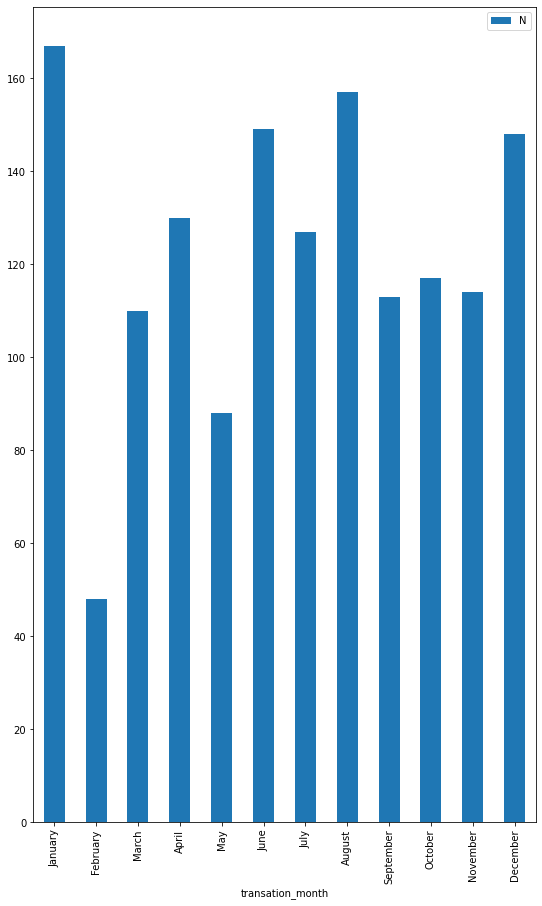

In [592]:
new_cust.plot.bar()

In [593]:
## We can say that there is a down in february in acquiring new customers but we can also see up in april, june,august
## and December month. 

## Understand the retention of customers on month on month basis

In [594]:
cust_retention = final_data[final_data.customer_id.duplicated()]

In [595]:
cust_retention.groupby("transation_month").agg(N = ("customer_id", "count"))

,N
transation_month,
April,4020
August,5993
December,4354
February,3236
January,3896
July,5124
June,4044
March,4236
May,4484


In [596]:
cust_retention_1 = pd.read_excel("cust_retention.xlsx")

In [597]:
cust_retention_1

,transation_month,revenue
0,January,436401.32
1,February,320704.37
2,March,323939.31
3,April,423471.20
4,May,306422.02
5,June,274059.70
6,July,406140.47
7,August,397828.95
8,September,307588.23
9,October,430910.29


In [598]:
cust_retention_1.set_index("transation_month", inplace=True)

<AxesSubplot:xlabel='transation_month'>

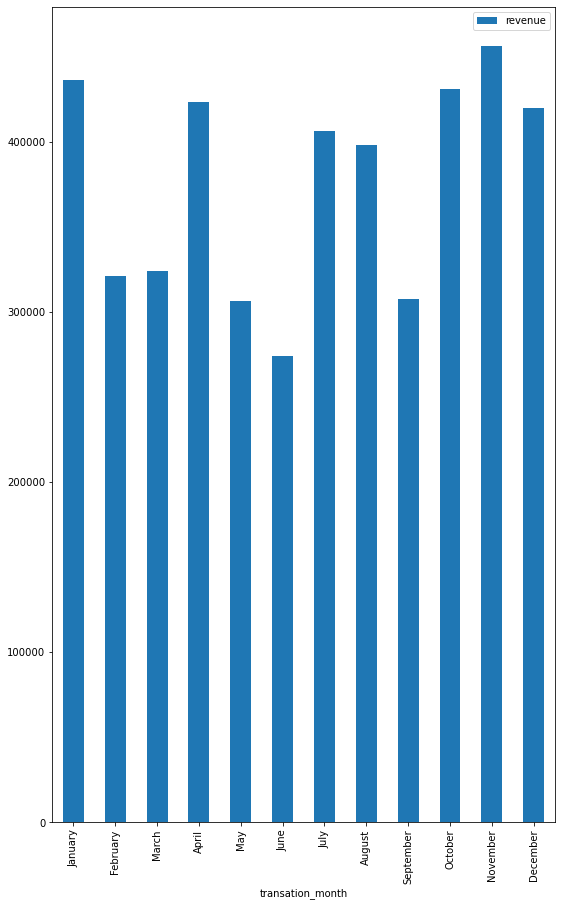

In [599]:
cust_retention_1.plot.bar()

## We can say that the customer retention is lowest in june month and highest in November month. 

## How the revenues from existing/new customers on month on month basis

In [600]:
## Revenues from existing customer : 

exs_cust_rev = cust_retention.groupby("transation_month").agg(revenue = ("invoice_value", "sum"))

In [601]:
exs_cust_rev_1  = pd.read_excel("exs_cust_rev.xlsx")

In [602]:
exs_cust_rev_1

,transation_month,revenue
0,January,436401.32
1,February,320704.37
2,March,323939.31
3,April,423471.20
4,May,306422.02
5,June,274059.70
6,July,406140.47
7,August,397828.95
8,September,307588.23
9,October,430910.29


In [603]:
exs_cust_rev_1.set_index("transation_month", inplace=True)

<AxesSubplot:xlabel='transation_month'>

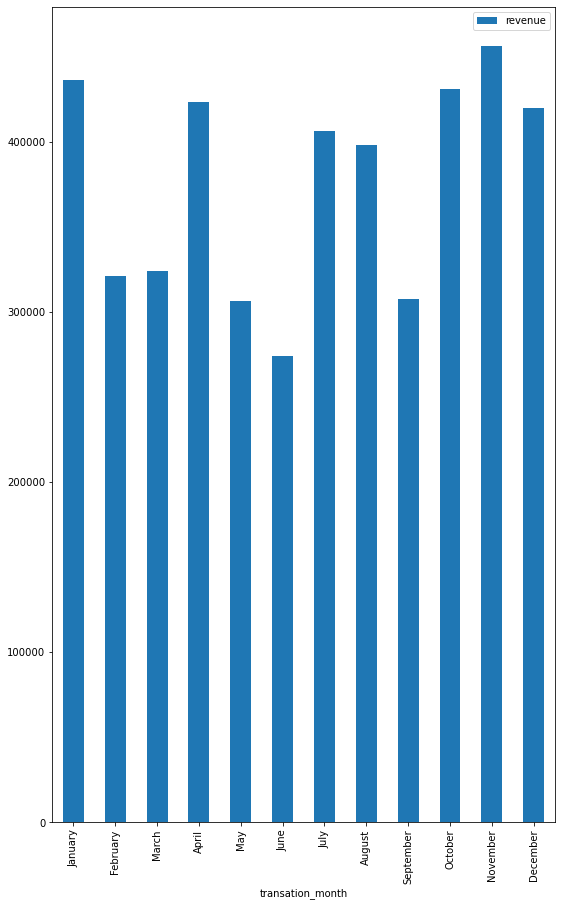

In [604]:
exs_cust_rev_1.plot.bar()

# Revenue of exsiting customer is highest in novmber month and lowest in june month.

In [605]:
## Revenues from new customer : 

In [606]:
new_cust_rev = unique_cust.groupby("transation_month").agg(revenue = ("invoice_value", "sum"))

<AxesSubplot:xlabel='transation_month'>

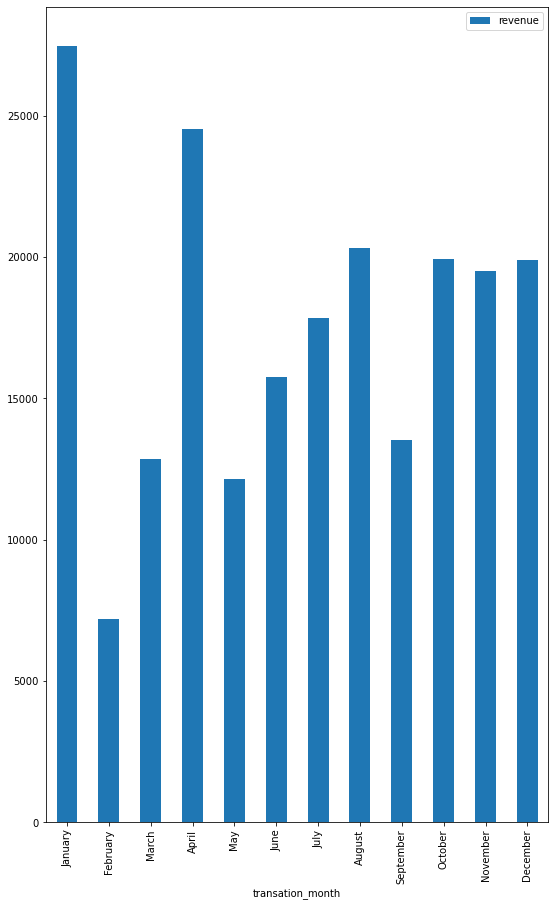

In [607]:
new_cust_rev_1  = pd.read_excel("new_cust_rev.xlsx")

new_cust_rev_1

new_cust_rev_1.set_index("transation_month", inplace=True)

new_cust_rev_1.plot.bar()

## Highest revenue is in january and lowest in february month of new customers.

## How the discounts playing role in the revenues?

In [608]:
data_copy = final_data.copy()

In [609]:
discount_anly = data_copy.groupby(["transation_month"]).agg(total_discount_offer = ("discount_pct", "sum"), total_revenue = ("invoice_value","sum"))

In [610]:
discount_anly = pd.read_excel("discount_anyl.xlsx")

In [611]:
discount_anly

,transation_month,total_discount_offer,total_revenue
0,January,40230,463883.06
1,February,64900,327896.56
2,March,128700,336805.20
3,April,40980,447999.20
4,May,90320,318556.30
5,June,124770,289830.33
6,July,51960,423982.34
7,August,122240,418160.57
8,September,128190,321128.36
9,October,41530,450837.46


In [612]:
discount_anly.set_index("transation_month",inplace=True)

<AxesSubplot:xlabel='transation_month'>

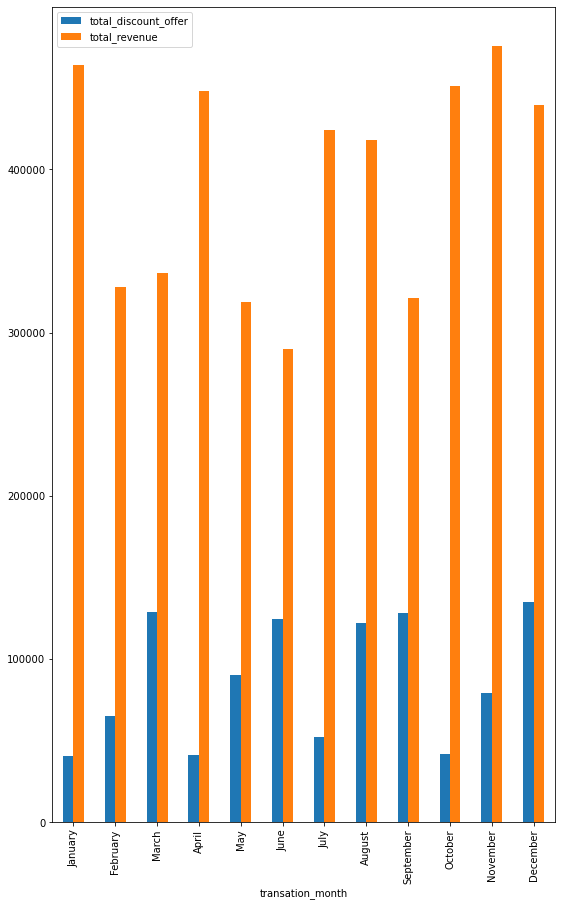

In [613]:
discount_anly.plot.bar()

In [614]:
## So as we can see that discount is not haveing a huge effect on revenue.

## Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

### Revenue : 

In [615]:
#By weekly basis : 
data_copy.groupby("weekday").agg(revenue_weekly = ("invoice_value", "sum")).reset_index().sort_values(by="revenue_weekly", ascending=False)

,weekday,revenue_weekly
0,Friday,872214.30
4,Thursday,855069.38
6,Wednesday,836607.54
3,Sunday,707840.86
2,Saturday,692889.26
5,Tuesday,393222.75
1,Monday,356667.46


In [616]:
##By product category :
data_copy.groupby("product_category").agg(revenue_product = ("invoice_value", "sum")).reset_index().sort_values(by="revenue_product", ascending=False)

,product_category,revenue_product
16,Nest-USA,2351315.54
2,Apparel,735450.44
14,Nest,439976.98
18,Office,344000.09
6,Drinkware,240267.75
4,Bags,168853.06
12,Lifestyle,114558.96
17,Notebooks & Journals,109368.14
15,Nest-Canada,65545.75
10,Headgear,53454.19


In [617]:
##By product month :
data_copy.groupby("transation_month").agg(revenue_monthly = ("invoice_value", "sum")).reset_index().sort_values(by="revenue_monthly", ascending=False)

,transation_month,revenue_monthly
9,November,475902.15
4,January,463883.06
10,October,450837.46
0,April,447999.20
2,December,439530.03
5,July,423982.34
1,August,418160.57
7,March,336805.20
3,February,327896.56
11,September,321128.36


## No of order :

In [618]:
data_copy.head(3)

,transation_day,transation_month,month_n,weekday,customer_id,transaction_id,product_sku,product_description,product_category,quantity,...,coupon_status,gender,location,cust_tenure_months,coupon_code,discount_pct,gst,offline_spend,online_spend,invoice_value
0,1,January,1,Tuesday,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,158.67
1,1,January,1,Tuesday,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,Used,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,158.67
2,1,January,1,Tuesday,17850,16696,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,Not Used,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,249.58


In [619]:
## by monthly: 
data_copy.groupby("transation_month").agg(monthly_order = ("quantity", "sum")).reset_index().sort_values(by="monthly_order", ascending=False)

,transation_month,monthly_order
1,August,27457
0,April,25277
5,July,22898
6,June,21619
7,March,20787
4,January,20140
11,September,19353
8,May,18715
10,October,17425
3,February,16575


In [620]:
## by weekdays: 
data_copy.groupby("weekday").agg(weekly_order = ("quantity", "sum")).reset_index().sort_values(by="weekly_order", ascending=False)

,weekday,weekly_order
0,Friday,52433
4,Thursday,44482
3,Sunday,40056
6,Wednesday,39797
2,Saturday,37965
1,Monday,11983
5,Tuesday,11317


In [621]:
## by weekdays: 
data_copy.groupby("product_category").agg(product_cat_order = ("quantity", "sum")).reset_index().sort_values(by="product_cat_order", ascending=False)

,product_category,product_cat_order
18,Office,88383
2,Apparel,32438
6,Drinkware,30501
12,Lifestyle,24881
16,Nest-USA,21430
4,Bags,15273
17,Notebooks & Journals,9556
10,Headgear,3533
14,Nest,2837
11,Housewares,2484


In [622]:
## Average order value : 

## By monthly : 

avg_order_monthly = data_copy.groupby(["transation_month","customer_id", "transaction_id"]).agg(transaction_cust = ("transaction_id","count"), revenue = ("invoice_value", "sum"))

avg_order_monthly["avg_order_value"]= avg_order_monthly["revenue"]/avg_order_monthly["transaction_cust"]

avg_order_monthly


transaction_cust  revenue  \
transation_month customer_id transaction_id                              
April            12429       25437                          6   457.00   
                             25438                          2   394.14   
                             25439                          1    65.46   
                             25440                          5   536.63   
                             25441                          1   316.00   
...                                                       ...      ...   
September        18223       37792                          1   189.26   
                             37793                          2    17.78   
                             37794                          2   248.39   
                             37796                          3    64.25   
                 18233       38186                          1    82.61   

                                             avg_order_value  
transation_month customer_id transaction_id                   
April            12429       25437                     76.17  
                             25438                    197.07  
                             25439                     65.46  
                             25440                    107.33  
                             25441                    316.00  
...                                                      ...  
September        18223       37792                    189.26  
                             37793                      8.89  
                             37794                    124.19  
                             37796                     21.42  
                 18233       38186                     82.61  

[26631 rows x 3 columns]

In [623]:
## By weekdays  : 

avg_order_weekday = data_copy.groupby(["weekday","customer_id", "transaction_id"]).agg(transaction_cust = ("transaction_id","count"), revenue = ("invoice_value", "sum"))

avg_order_weekday["avg_order_value"]= avg_order_weekday["revenue"]/avg_order_weekday["transaction_cust"]

avg_order_weekday

transaction_cust  revenue  \
weekday   customer_id transaction_id                              
Friday    12347       42370                          2    52.10   
                      42371                          2    29.33   
          12359       36385                          1    17.16   
                      36386                          1   137.12   
                      36387                         14   498.91   
...                                                ...      ...   
Wednesday 18239       19193                          1   158.67   
                      19194                          1   899.20   
                      19195                          3   245.15   
                      44929                          2   327.16   
          18277       41388                          1   301.02   

                                      avg_order_value  
weekday   customer_id transaction_id                   
Friday    12347       42370                     26.05  
                      42371                     14.67  
          12359       36385                     17.16  
                      36386                    137.12  
                      36387                     35.64  
...                                               ...  
Wednesday 18239       19193                    158.67  
                      19194                    899.20  
                      19195                     81.72  
                      44929                    163.58  
          18277       41388                    301.02  

[26631 rows x 3 columns]

In [624]:
## By product_category  : 

avg_order_product = data_copy.groupby(["product_category","customer_id", "transaction_id"]).agg(transaction_cust = ("transaction_id","count"), revenue = ("invoice_value", "sum"))

avg_order_product["avg_order_value"]= avg_order_product["revenue"]/avg_order_product["transaction_cust"]

avg_order_product

transaction_cust  revenue  \
product_category customer_id transaction_id                              
Accessories      12347       42392                          1     8.63   
                 12410       47784                          1    21.87   
                 12468       43087                          2    30.03   
                 12471       31297                          1    50.78   
                 12472       42106                          1     8.37   
...                                                       ...      ...   
Waze             18245       44978                          2    27.09   
                             44987                          2   137.49   
                 18250       46691                          1    62.80   
                 18260       39892                          1    35.82   
                 18283       40266                          1    13.42   

                                             avg_order_value  
product_category customer_id transaction_id                   
Accessories      12347       42392                      8.63  
                 12410       47784                     21.87  
                 12468       43087                     15.01  
                 12471       31297                     50.78  
                 12472       42106                      8.37  
...                                                      ...  
Waze             18245       44978                     13.54  
                             44987                     68.74  
                 18250       46691                     62.80  
                 18260       39892                     35.82  
                 18283       40266                     13.42  

[35439 rows x 3 columns]

## Understand the trends/seasonality of sales by category, location, month etc…

In [625]:
## By category : 
sales_category = pd.pivot_table(data_copy, values="invoice_value", index="product_category", columns="transation_month", aggfunc="sum").fillna(0).T

In [626]:
sales_category

product_category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
transation_month,,,,,,,,,,,,,,,,,,,,
April,190.29,52.58,107452.97,1292.94,13840.20,718.23,32391.04,2972.61,685.12,1241.06,12236.05,179.45,12599.71,518.19,0.00,5799.69,187293.96,23037.23,44511.50,986.37
August,351.29,134.29,74859.33,1708.52,17826.14,697.19,27239.49,439.98,630.00,312.91,19331.36,1069.43,12096.06,0.00,17964.56,4564.80,180390.37,26773.29,30784.29,987.29
December,1007.52,0.00,51062.69,0.00,8506.11,0.00,10120.53,0.00,588.10,0.00,1325.80,0.00,2355.97,0.00,112616.63,4300.49,227924.61,789.62,17964.78,967.17
February,0.00,24.09,49088.49,662.21,21111.64,508.44,18913.03,513.52,336.00,1843.49,4487.80,163.06,12111.29,546.67,0.00,3693.59,179919.17,5978.69,27312.84,682.53
January,57.55,99.50,56205.71,336.03,14642.23,1048.13,19916.10,450.33,268.09,1314.95,2706.59,1585.18,10240.74,1694.71,0.00,9912.01,292057.10,7493.63,42836.66,1017.82
July,1960.21,162.75,87393.68,853.89,14655.60,1530.78,16287.61,1390.71,472.50,1953.54,2988.91,1492.50,14306.00,0.00,0.00,7931.04,214855.85,23874.52,31472.53,399.71
June,215.94,186.36,52375.17,366.68,12031.19,650.08,17235.31,970.50,882.00,1367.91,1440.19,410.56,7684.81,0.00,0.00,7494.94,158088.32,4300.72,23433.54,696.13
March,52.69,215.56,65829.51,802.21,15191.08,571.80,24945.03,1015.02,275.62,3342.68,3058.83,853.14,10611.41,721.33,0.00,6106.38,161977.15,4653.63,35315.09,1267.04
May,174.03,110.92,71011.27,1703.00,11111.89,1334.60,18910.11,930.84,1113.00,1792.28,3114.91,584.06,7814.26,492.21,0.00,3524.73,159457.90,5832.84,28713.43,830.01


In [627]:
sales_category = pd.read_excel("sales_category.xlsx")

In [628]:
sales_category.set_index("transation_month", inplace=True)

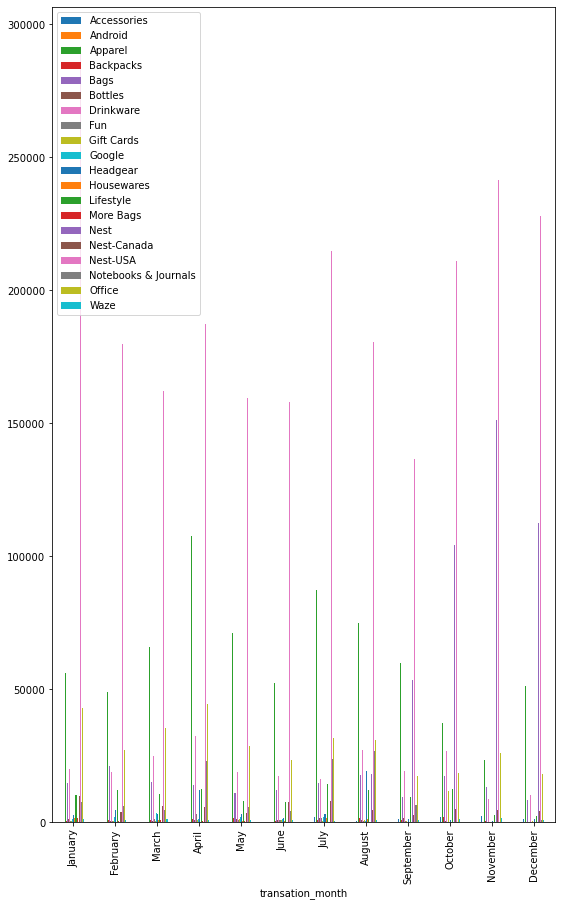

In [629]:
sales_category.plot.bar()
plt.rcParams["figure.figsize"] = (20,10)

In [630]:
# By location : 
sales_location = pd.pivot_table(data_copy, values="invoice_value", index="location", columns="transation_month", aggfunc="sum").T
sales_location

location,California,Chicago,New Jersey,New York,Washington DC
transation_month,,,,,
April,136730.70,167384.79,49839.93,72742.06,21301.71
August,123250.06,165528.69,23652.23,85690.29,20039.29
December,154154.56,161211.07,44143.34,63118.02,16903.05
February,94949.29,119951.50,30421.75,46254.37,36319.65
January,176474.36,122722.77,35390.74,90668.26,38626.92
July,135887.77,148120.35,25733.69,92756.46,21484.08
June,90351.60,90869.02,35545.40,61746.66,11317.65
March,94542.81,116461.49,18816.64,90952.80,16031.46
May,90442.58,114245.73,28634.34,79045.13,6188.52


In [631]:
sales_location = pd.read_excel("sales_location.xlsx")
sales_location.set_index("transation_month", inplace=True)

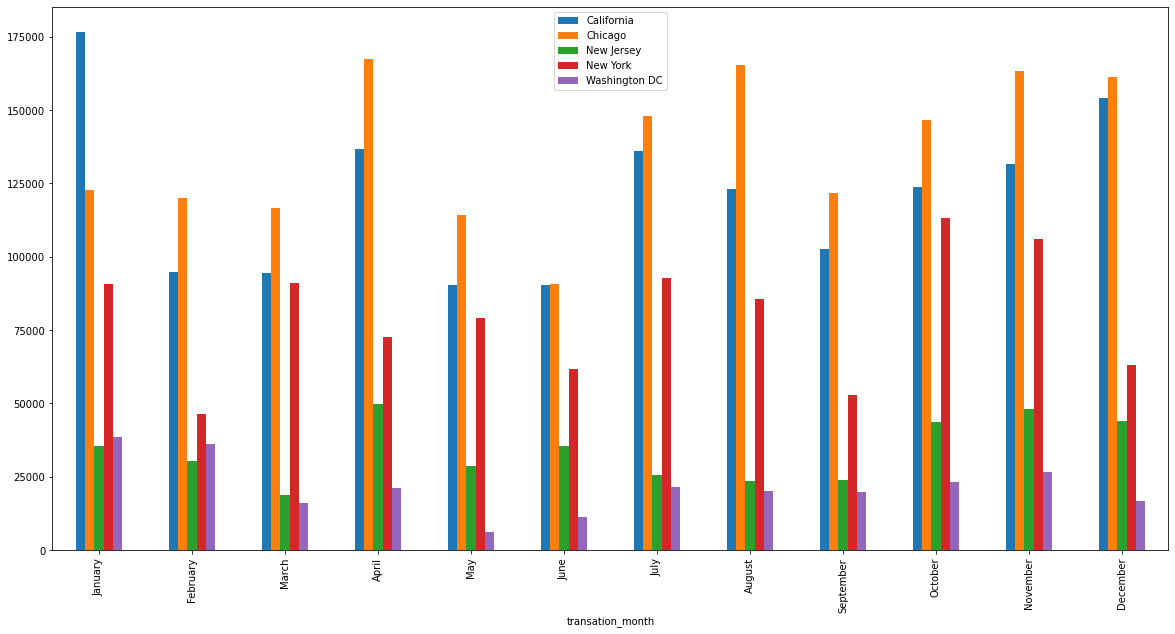

In [632]:
sales_location.plot.bar()
plt.rcParams["figure.figsize"] = (21.5,10)

In [633]:
data_copy.groupby("transation_month").agg(sales = ("invoice_value", "sum"))

,sales
transation_month,
April,447999.20
August,418160.57
December,439530.03
February,327896.56
January,463883.06
July,423982.34
June,289830.33
March,336805.20
May,318556.30


In [634]:
sales_month = pd.read_excel("sales_month.xlsx")

In [635]:
sales_month.set_index("transation_month", inplace=True)

<AxesSubplot:xlabel='transation_month'>

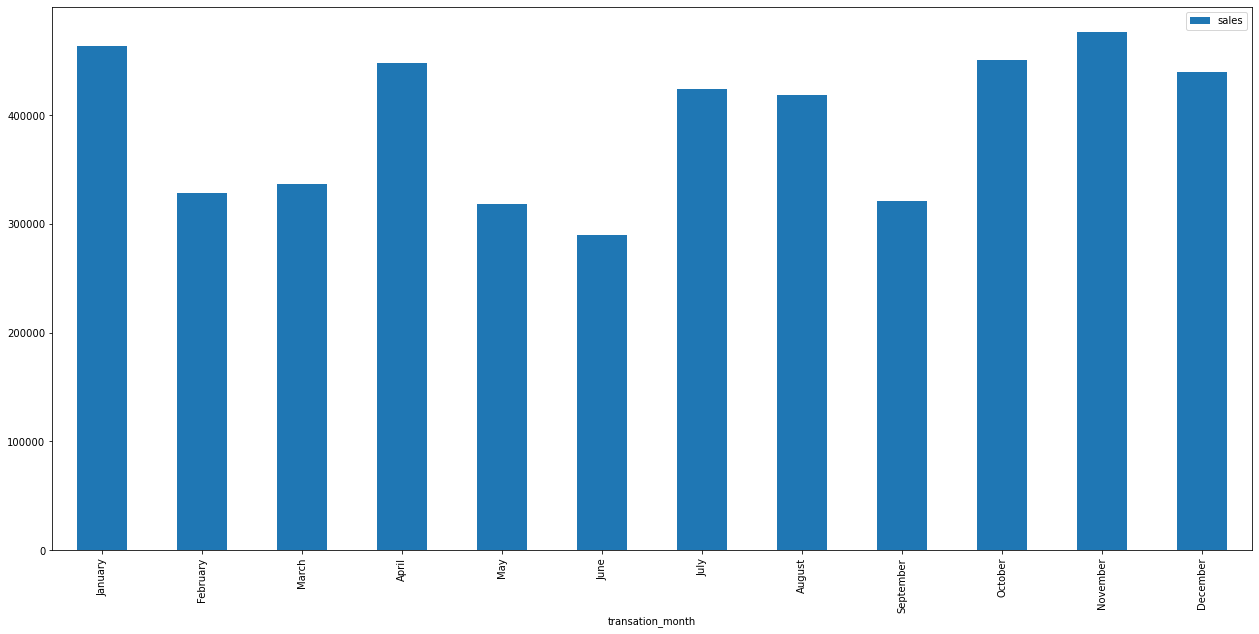

In [636]:
sales_month.plot.bar()

## How number order varies and sales with different days?

In [637]:
weekday_sales = data_copy.groupby("weekday").agg(order_no = ("weekday", "count"),sales = ("invoice_value", "sum")).to_excel("weekday_sales.xlsx")

In [638]:
weekday_sales= pd.read_excel("weekday_sales.xlsx")

In [639]:
weekday_sales.set_index("weekday", inplace=True)

In [640]:
weekday_sales

,order_no,sales
weekday,,
Friday,9266,872214.30
Monday,4464,356667.46
Saturday,8177,692889.26
Sunday,8519,707840.86
Thursday,9000,855069.38
Tuesday,4611,393222.75
Wednesday,8887,836607.54


In [641]:
## To match the ploting size of order_no , just multiplying the each order_no with  10. so that the ploting will be visible. 
weekday_sales.order_no = weekday_sales.order_no*10

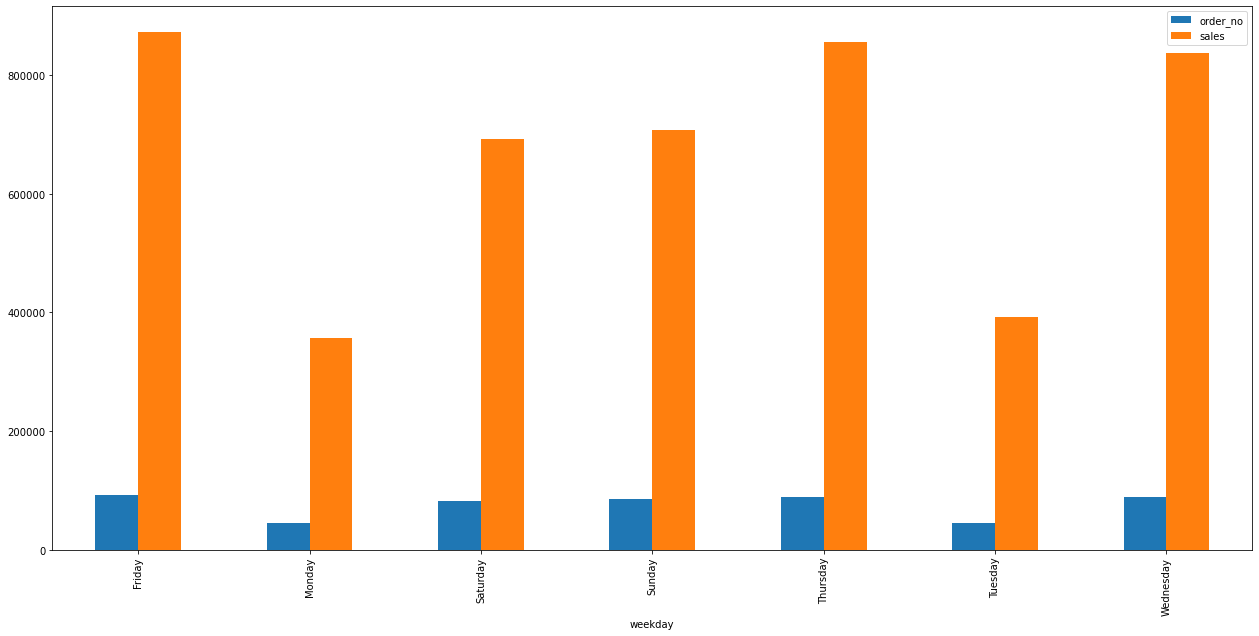

In [642]:
weekday_sales.plot.bar()
plt.rcParams["figure.figsize"] = (8,12)

## Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [643]:
revenue = data_copy.groupby(["transation_month", "transation_day"]).agg(revenue= ("invoice_value", "sum"))

In [644]:
marketing_spend.set_index("new_date", inplace=True)

In [645]:
marketing_spend["transation_month"] = marketing_spend.index.month_name()

In [646]:
marketing_spend["transation_day"] = marketing_spend.index.day

In [647]:
marketing_spend["total_marketing_spend"] = marketing_spend.offline_spend+marketing_spend.online_spend

In [648]:
marketing_spend_new = marketing_spend.groupby(["transation_month", "transation_day"]).agg( marketing_spend = ("total_marketing_spend" ,np.average))

In [649]:
revenue_marketing_spend  = pd.merge(left=revenue , right=marketing_spend_new ,how="inner",on=["transation_month","transation_day"] )

In [650]:
## REvenue and marketing spend : 
revenue_marketing_spend

revenue  marketing_spend
transation_month transation_day                          
April            1               5489.78          6019.93
                 2               5472.64          4409.27
                 3               9925.19          4248.14
                 4              11813.94          3636.06
                 5              56753.00          4842.68
...                                  ...              ...
September        26             16011.52          3767.58
                 27             21597.19          4660.74
                 28             13889.09          4394.83
                 29              9751.14          6713.10
                 30              7829.52          4478.16

[365 rows x 2 columns]

In [651]:
## Percentage of marketing spend in revenue : 

revenue_marketing_spend["mar_spend_in_rev%"]=(revenue_marketing_spend.marketing_spend/revenue_marketing_spend.revenue)*100
revenue_marketing_spend

revenue  marketing_spend  mar_spend_in_rev%
transation_month transation_day                                             
April            1               5489.78          6019.93             109.66
                 2               5472.64          4409.27              80.57
                 3               9925.19          4248.14              42.80
                 4              11813.94          3636.06              30.78
                 5              56753.00          4842.68               8.53
...                                  ...              ...                ...
September        26             16011.52          3767.58              23.53
                 27             21597.19          4660.74              21.58
                 28             13889.09          4394.83              31.64
                 29              9751.14          6713.10              68.84
                 30              7829.52          4478.16              57.20

[365 rows x 3 columns]

In [652]:
## Calculate the Tax & percentage of delivery charges by month : 
rev_delivery = data_copy.groupby("transation_month").agg(revenue = ("invoice_value", "sum"), tax = ("gst", "sum"), delivery_char = ("delivery_charges", "sum"))

In [653]:
rev_delivery["per_delivery_char"]= (rev_delivery.delivery_char/rev_delivery.revenue)*100

In [654]:
rev_delivery

,revenue,tax,delivery_char,per_delivery_char
transation_month,,,,
April,447999.20,591.56,41481.74,9.26
August,418160.57,913.41,61099.57,14.61
December,439530.03,548.88,37881.99,8.62
February,327896.56,447.00,49216.60,15.01
January,463883.06,535.06,59242.32,12.77
July,423982.34,760.71,48723.93,11.49
June,289830.33,600.45,37513.58,12.94
March,336805.20,616.01,60799.94,18.05
May,318556.30,662.23,41396.17,12.99


## How marketing spend is impacting on revenue?

In [655]:
revenue_1 = data_copy.groupby( "transation_month").agg(revenue= ("invoice_value", "sum"))

In [656]:
marketing_spend_1 = marketing_spend.groupby("transation_month").agg(marketing_spend = ("total_marketing_spend", "sum"))

In [657]:
rev_mark_spend_monthly =  pd.merge(left=revenue_1 , right=marketing_spend_1 ,how="inner",on="transation_month" )

In [658]:
rev_mark_spend_monthly = pd.read_excel("rev_mark_spend_monthly.xlsx")

In [659]:
rev_mark_spend_monthly.set_index("transation_month", inplace=True)

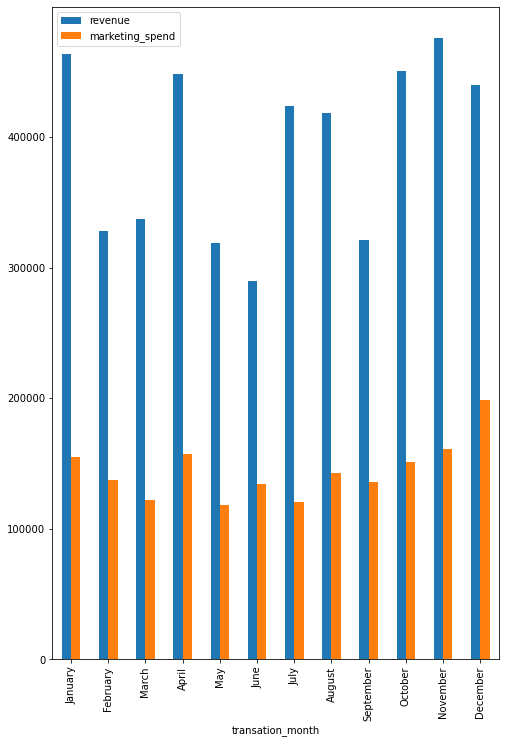

In [660]:
rev_mark_spend_monthly.plot.bar()
plt.rcParams["figure.figsize"] = (9,15)

## Which product was appeared in the transactions:

In [661]:
data_copy.product_category.value_counts()

Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: product_category, dtype: int64

## Which product was purchased mostly based on the quantity?

In [662]:
data_copy.groupby("product_category").agg(quantity = ("quantity", "sum")).sort_values(by="quantity", ascending=False)

,quantity
product_category,
Office,88383
Apparel,32438
Drinkware,30501
Lifestyle,24881
Nest-USA,21430
Bags,15273
Notebooks & Journals,9556
Headgear,3533
Nest,2837


## 3. Performing Customer Segmentation: 

### Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

## Value based segmentation : 

In [663]:
data_cust_value = data_copy[["customer_id","invoice_value"]].groupby( "customer_id").agg(value = ("invoice_value", "sum"))


In [664]:
final_cust_value = pd.merge(left=data_cust_value , right=cust_demo , how="inner", on="customer_id")

pd.qcut(final_cust_value.value, 4)

final_cust_value["cust_category"] = np.where(final_cust_value.value<=671.552 , "Std Customer" , np.where(final_cust_value.value<=1787.398, "Silver", np.where(final_cust_value.value<=3932.687, "Gold", "Premium")))

final_cust_value = final_cust_value.drop({"value","gender","location","cust_tenure_months"},axis=1)


In [665]:
final_cust_value

,customer_id,cust_category
0,12346,Std Customer
1,12347,Premium
2,12348,Silver
3,12350,Silver
4,12356,Silver
...,...,...
1463,18259,Silver
1464,18260,Gold
1465,18269,Std Customer
1466,18277,Std Customer


In [666]:
data_new = data_copy.copy()

data_new = pd.merge(left=data_new , right=final_cust_value , how="inner", on="customer_id")

data_new.columns

data_new_1 = data_new [data_new.columns.difference(["avg_price",'transation_day','transation_year','customer_id','transaction_id', 'product_sku', 'product_description','delivery_charges','coupon_code', 'discount_pct', 'gst' ])]

data_new_1_std_cust = data_new_1[data_new_1.cust_category == "Std Customer"]

data_new_1_silver_cust = data_new_1[data_new_1.cust_category == "Silver"]

data_new_1_gold_cust = data_new_1[data_new_1.cust_category == "Gold"]

data_new_1_prm_cust = data_new_1[data_new_1.cust_category == "Premium"]

California       751
Chicago          604
New York         550
New Jersey       217
Washington DC     97
Name: location, dtype: int64

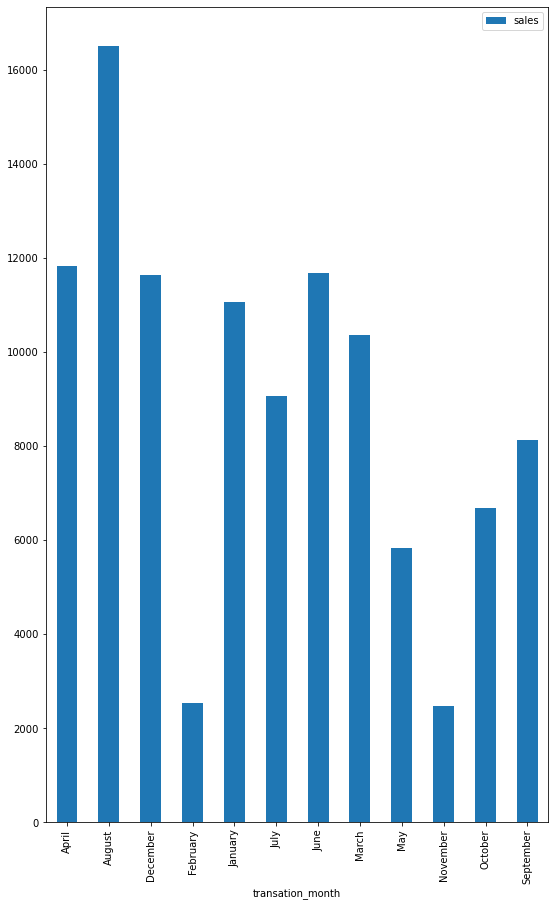

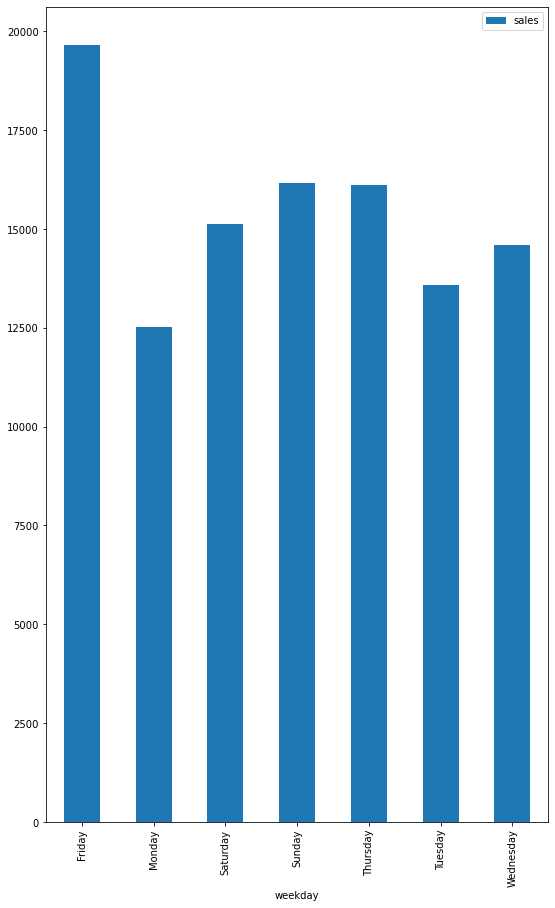

In [667]:
data_new_1_std_cust

data_new_1_std_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum") ).plot.bar()

data_new_1_std_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()

data_new_1_std_cust.product_category.value_counts().head(5)

data_new_1_std_cust.product_category.value_counts().tail(5)

data_new_1_std_cust.coupon_status.value_counts()

data_new_1_std_cust.gender.value_counts()

data_new_1_std_cust.location.value_counts()

In [668]:
## Stratergy for standard customer : 
# 1) Feb and nov are the least buying period for this category , so we should do some marketing specially during
# this period to increasethe sales.

# 2) We should try to give some more discount on mondays as the sales are the lowest on mondays and that also on most sold 
# product category that is Apparel, office, Nest-usa, Drinkwar etc. 

# 3) We should need to aware them more about the coupon_status as most of them are click / not used the coupon. 

# 4) We should traget more male customers by marketing specially from the location like california. chicaga and New york as 
# this category have less male ratio. 



California       1948
Chicago          1797
New York         1323
New Jersey        608
Washington DC     216
Name: location, dtype: int64

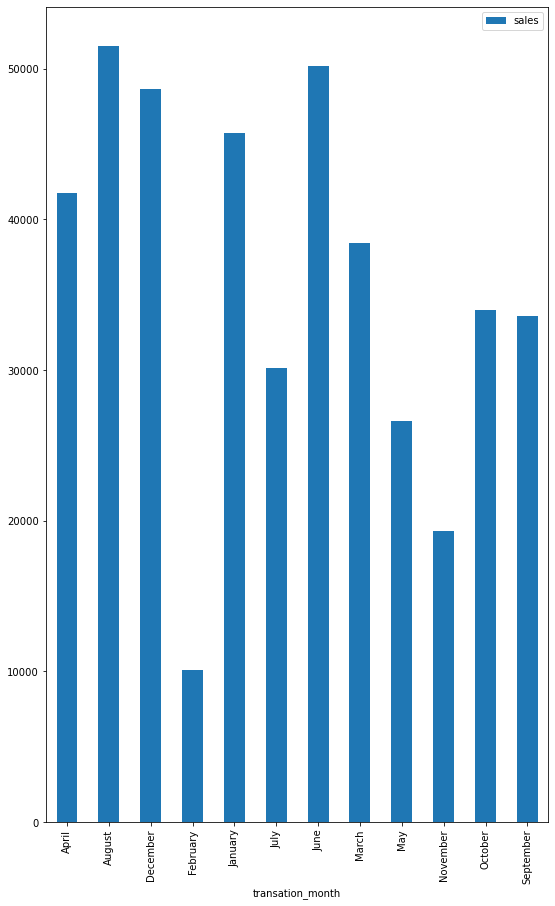

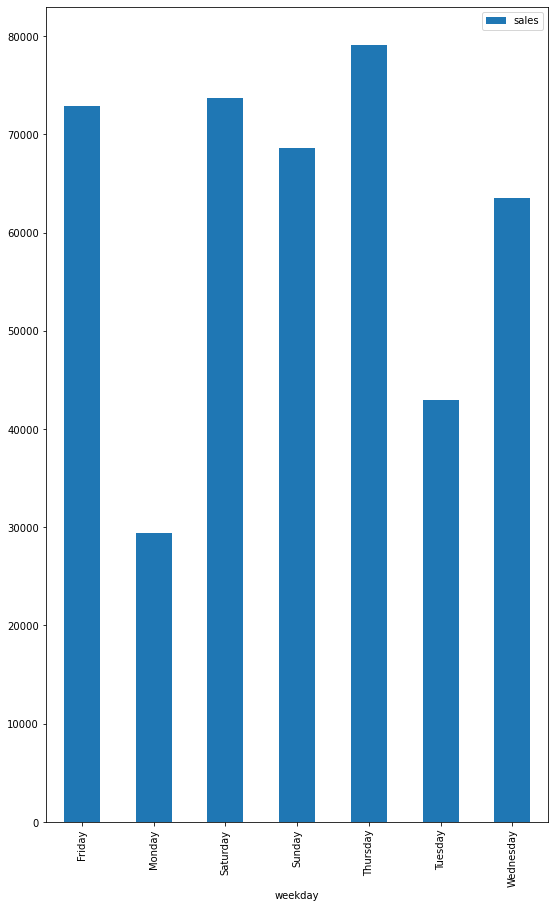

In [669]:
data_new_1_silver_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

data_new_1_silver_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()

data_new_1_silver_cust.product_category.value_counts().head(5)

data_new_1_silver_cust.coupon_status.value_counts()/data_new_1_silver_cust.coupon_status.value_counts().sum()

data_new_1_silver_cust.gender.value_counts()/data_new_1_silver_cust.gender.value_counts().sum()

data_new_1_silver_cust.location.value_counts()

In [670]:
## Stratergy for silver customer : 
# 1) Feb is the least buying period for this category , so we should do some marketing specially during
# this period to increase the sales.

# 2) We should try to give some more discount on mondays & tuesday as the sales are the lowest on mondays and 
# that also on most sold product category that is Apparel, office, Nest-usa, Drinkwar etc. 

# 3) We should need to aware them more about the coupon_status as most of them are click / not used the coupon. 

# 4) We should traget more male customers by marketing specially from the location like california. chicaga and New york as 
# this category have less male ratio.


<AxesSubplot:xlabel='weekday'>

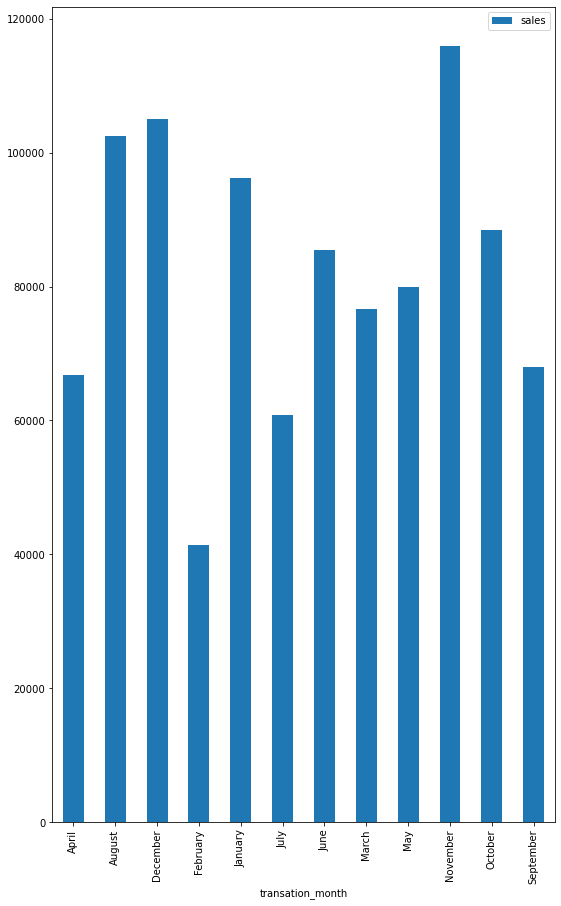

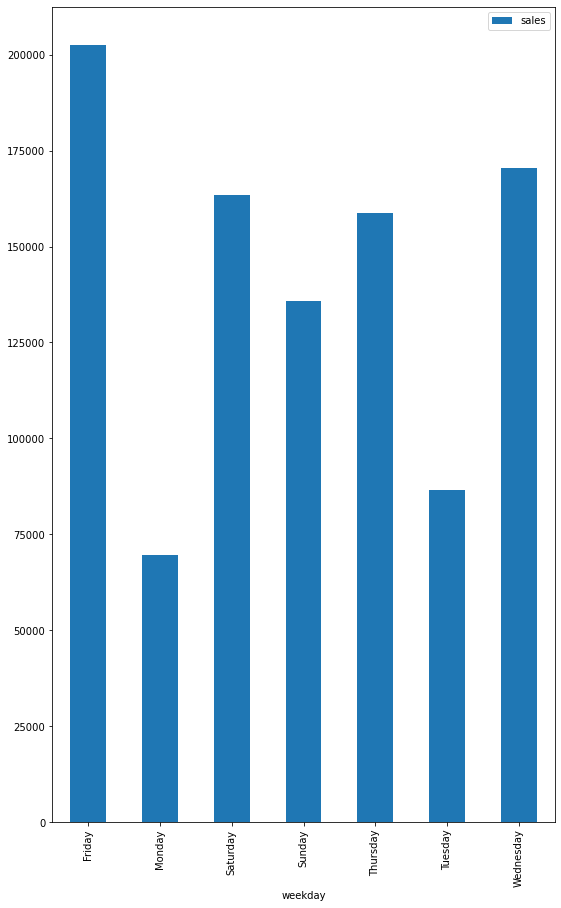

In [671]:
data_new_1_gold_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

data_new_1_gold_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()



In [672]:
data_new_1_gold_cust.product_category.value_counts().head(5)

Apparel      4117
Nest-USA     3189
Office       1479
Drinkware     758
Lifestyle     694
Name: product_category, dtype: int64

In [673]:
data_new_1_gold_cust.coupon_status.value_counts()/data_new_1_gold_cust.coupon_status.value_counts().sum()

Clicked    0.51
Used       0.34
Not Used   0.15
Name: coupon_status, dtype: float64

In [674]:
data_new_1_gold_cust.gender.value_counts()/data_new_1_gold_cust.gender.value_counts().sum()

F   0.59
M   0.41
Name: gender, dtype: float64

In [675]:
data_new_1_gold_cust.location.value_counts()

California       3744
Chicago          3649
New York         2615
New Jersey       1164
Washington DC     693
Name: location, dtype: int64

In [676]:
## Stratergy for gold customer : 
# 1) Feb, july , april and september is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays ,tuesday and sunday  as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa, Drinkwar etc. 

# 3) We should need to aware them more about the coupon_status as most of them are click / not used the coupon. 

# 4) We should traget both male and female customers by marketing specially from the location like california. chicaga and 
# New york. 


<AxesSubplot:xlabel='weekday'>

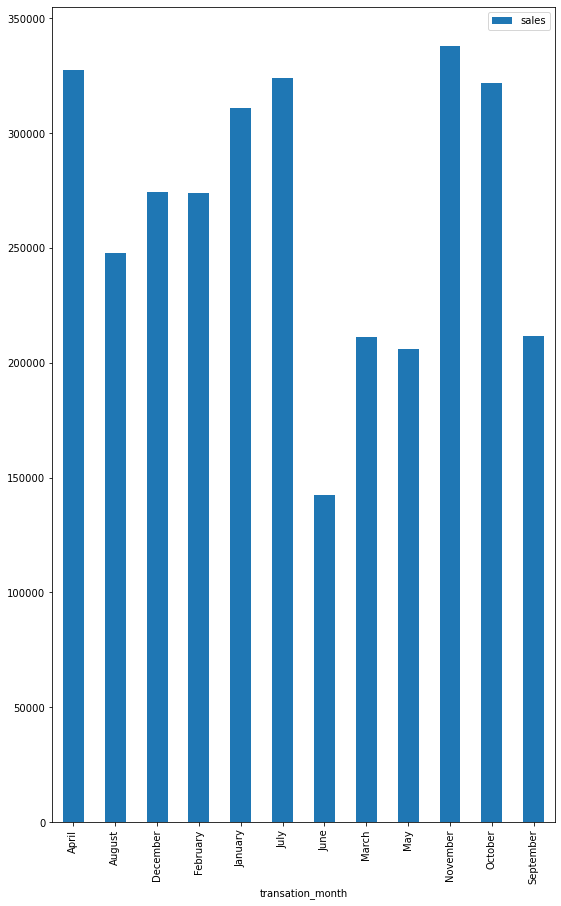

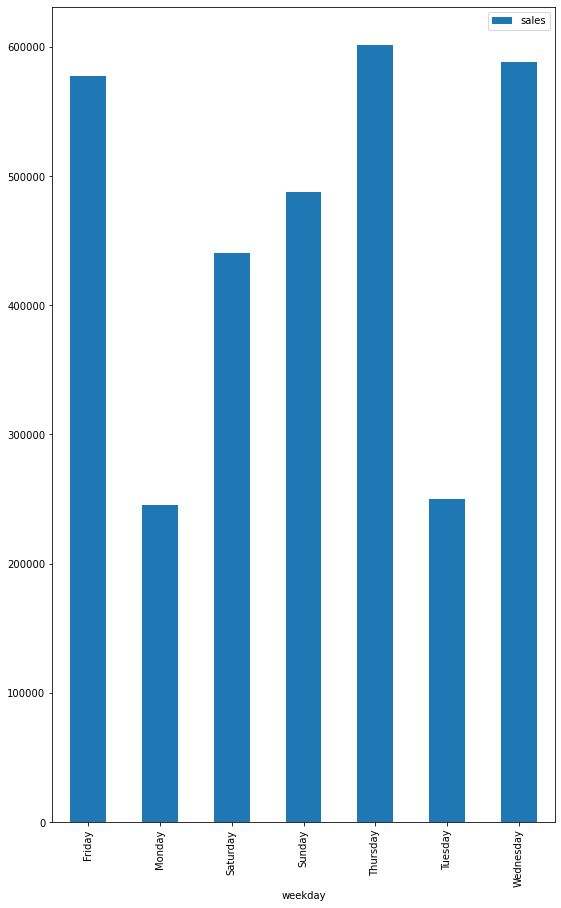

In [677]:
data_new_1_prm_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

data_new_1_prm_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()

In [678]:
data_new_1_prm_cust.product_category.value_counts().head(5)

Apparel      10866
Nest-USA      9095
Office        3959
Drinkware     2141
Lifestyle     1876
Name: product_category, dtype: int64

In [679]:
data_new_1_prm_cust.coupon_status.value_counts()/data_new_1_prm_cust.coupon_status.value_counts().sum()

Clicked    0.51
Used       0.34
Not Used   0.15
Name: coupon_status, dtype: float64

In [680]:
data_new_1_prm_cust.gender.value_counts()/data_new_1_prm_cust.gender.value_counts().sum()

F   0.63
M   0.37
Name: gender, dtype: float64

In [681]:
data_new_1_prm_cust.location.value_counts()

Chicago          12330
California        9693
New York          6685
New Jersey        2514
Washington DC     1726
Name: location, dtype: int64

In [682]:
## Stratergy for Premium customer : 
# 1) March, may and june is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays ,tuesday and saturday  as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa, Drinkwar etc. 

# 3) We should need to aware them more about the coupon_status as most of them are click / not used the coupon. 

# 4) We should traget both male  customers by marketing specially from the location like california. chicaga and 
# New york. 


## RFM : 

In [683]:
# define recency : (( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST)) + Delivery_Charges

In [684]:
sales_1 = sales.copy()

In [685]:
sales_1 = pd.merge(left=sales_1 , right= discount,how="inner" , on="month")

In [686]:
sales_1.rename({"product_category_x":"product_category"},axis=1, inplace=True )

In [687]:
sales_1 = pd.merge(left=sales_1 , right= tax,how="inner" , on="product_category")

In [688]:
sales_1 ["invoice_value"] = ((sales_1.quantity*sales_1.avg_price)*(1-(sales_1.discount_pct)/100)*(1+sales_1.gst))+sales_1.delivery_charges

In [689]:
sales_1.head(4)

,transation_date_new,customer_id,transaction_id,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,...,transation_day,transation_year,month_name,weekday,month,product_category_y,coupon_code,discount_pct,gst,invoice_value
0,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,2019,January,Tuesday,Jan,Apparel,SALE10,10,0.10,158.67
1,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,2019,January,Tuesday,Jan,Nest-USA,ELEC10,10,0.10,158.67
2,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,2019,January,Tuesday,Jan,Office,OFF10,10,0.10,158.67
3,2019-01-01,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,2019,January,Tuesday,Jan,Drinkware,EXTRA10,10,0.10,158.67


In [690]:
rfm = sales_1.groupby(["customer_id", "transation_date_new", "transaction_id"]).agg(sales = ("invoice_value", "sum"))

In [691]:
rfm.reset_index(inplace=True)

In [692]:
rfm

,customer_id,transation_date_new,transaction_id,sales
0,12346,2019-09-15,38223,2974.69
1,12347,2019-03-24,23979,659.85
2,12347,2019-03-24,23980,7341.96
3,12347,2019-03-24,23981,5626.60
4,12347,2019-03-24,23984,122406.59
...,...,...,...,...
26626,18283,2019-10-10,40286,1692.44
26627,18283,2019-10-10,40288,924.50
26628,18283,2019-10-10,40289,653.93
26629,18283,2019-10-10,40290,1088.28


In [693]:
rfm['transation_date_new'].min(),rfm['transation_date_new'].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [694]:
## Taking the present date as mention below for calculation of recency : 

PRESENT = dt.datetime(2020,1,10)

In [695]:
rfm = rfm.groupby('customer_id').agg({'transation_date_new': lambda date: (PRESENT - date.max()).days,'transaction_id': lambda num: len(num),'sales': lambda price: price.sum()})

In [696]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [697]:
rfm

,recency,frequency,monetary
customer_id,,,
12346,117,1,2974.69
12347,69,31,205409.48
12348,83,8,25532.75
12350,27,11,20123.14
12356,117,13,29808.66
...,...,...,...
18259,280,3,13843.68
18260,97,19,44815.32
18269,204,2,2646.24


In [698]:
rfm['r_seg'] = pd.qcut(rfm['recency'], 3, ['3','2','1'])
rfm['f_seg'] = pd.qcut(rfm['frequency'], 3, ['1','2','3'])
rfm['m_seg'] = pd.qcut(rfm['monetary'], 3, ['1','2','3'])

## for all seg :  4 is good , 1 is bad 


In [699]:
rfm.head()

,recency,frequency,monetary,r_seg,f_seg,m_seg
customer_id,,,,,,
12346,117,1,2974.69,2,1,1
12347,69,31,205409.48,3,3,3
12348,83,8,25532.75,3,2,2
12350,27,11,20123.14,3,2,2
12356,117,13,29808.66,2,2,2


In [700]:
# Combine all three seg in a single column, this rank will help us to get the final customers segments.

rfm['rfm_score'] = rfm.r_seg.astype(str)+ rfm.f_seg.astype(str) + rfm.m_seg.astype(str)
rfm.head()

,recency,frequency,monetary,r_seg,f_seg,m_seg,rfm_score
customer_id,,,,,,,
12346,117,1,2974.69,2,1,1,211
12347,69,31,205409.48,3,3,3,333
12348,83,8,25532.75,3,2,2,322
12350,27,11,20123.14,3,2,2,322
12356,117,13,29808.66,2,2,2,222


In [701]:
rfm.rfm_score = rfm.rfm_score.astype("int")

In [702]:
rfm.rfm_score.value_counts().index

Int64Index([333, 111, 211, 233, 322, 222, 122, 133, 311, 112, 212, 323, 312,
            221, 223, 232, 332, 121, 132, 123, 321, 113, 213, 313],
           dtype='int64')

In [703]:
## Premium customers  = 333, 323

## Gold customers  = 233 , 322 , 222, 223 , 232 , 332 , 

## Silver customers  = 122/133/212/312/221/132/123/321/213  

## Standard customers  = 111 , 211 , 311,112 , 121 ,113 ,  313



In [704]:
rfm["customer_segment"]  = np.where(((rfm.rfm_score == (333))|(rfm.rfm_score == (323))) , "Premium customer", np.where(((rfm.rfm_score == (233))|(rfm.rfm_score == (322))|(rfm.rfm_score == (222))|(rfm.rfm_score == (223))|(rfm.rfm_score == (232))|(rfm.rfm_score == (332))) , "Gold customer" ,np.where(((rfm.rfm_score == (122))|(rfm.rfm_score == (133))|(rfm.rfm_score == (212))|(rfm.rfm_score == (312))|(rfm.rfm_score == (221))|(rfm.rfm_score == (132))|(rfm.rfm_score == (123))|(rfm.rfm_score == (321))|(rfm.rfm_score == (213))) , "Silver customer", "Standard customer" )))

In [705]:
rfm.customer_segment.value_counts()

Standard customer    511
Gold customer        410
Silver customer      318
Premium customer     229
Name: customer_segment, dtype: int64

In [706]:
rfm.reset_index(inplace=True)

In [707]:
rfm

,customer_id,recency,frequency,monetary,r_seg,f_seg,m_seg,rfm_score,customer_segment
0,12346,117,1,2974.69,2,1,1,211,Standard customer
1,12347,69,31,205409.48,3,3,3,333,Premium customer
2,12348,83,8,25532.75,3,2,2,322,Gold customer
3,12350,27,11,20123.14,3,2,2,322,Gold customer
4,12356,117,13,29808.66,2,2,2,222,Gold customer
...,...,...,...,...,...,...,...,...,...
1463,18259,280,3,13843.68,1,1,1,111,Standard customer
1464,18260,97,19,44815.32,2,3,2,232,Gold customer
1465,18269,204,2,2646.24,1,1,1,111,Standard customer
1466,18277,79,1,5117.34,3,1,1,311,Standard customer


In [708]:
rfm_1 = rfm[["customer_id", "customer_segment"]]

In [709]:
rfm_final = pd.merge(left=data_copy , right= rfm_1, how="inner", on="customer_id")

In [710]:
rfm_final.customer_segment.value_counts()

Premium customer     19213
Gold customer        18870
Silver customer      10823
Standard customer     4018
Name: customer_segment, dtype: int64

In [711]:
rfm_final = rfm_final [rfm_final.columns.difference(["avg_price",'transation_day','transation_year','customer_id','transaction_id', 'product_sku', 'product_description','delivery_charges','coupon_code', 'discount_pct', 'gst' ])]

In [712]:
rfm_std_cust = rfm_final[rfm_final.customer_segment == "Standard customer"]

rfm_std__silver_cust =  rfm_final[ rfm_final.customer_segment == "Silver customer"]

rfm_std_gold_cust =  rfm_final[ rfm_final.customer_segment == "Gold customer"]

rfm_std_prm_cust = rfm_final[ rfm_final.customer_segment == "Premium customer"]

In [713]:
rfm_std_prm_cust

,coupon_status,cust_tenure_months,customer_segment,gender,invoice_value,location,month_n,offline_spend,online_spend,product_category,quantity,transation_month,weekday
389,Clicked,46,Premium customer,F,158.67,New York,1,4500,2424.50,Nest-USA,1,January,Tuesday
390,Clicked,46,Premium customer,F,128.04,New York,1,4500,2424.50,Nest-USA,1,January,Tuesday
391,Used,46,Premium customer,F,158.67,New York,1,4500,2424.50,Nest-USA,1,January,Tuesday
392,Not Used,46,Premium customer,F,128.04,New York,1,4500,3480.36,Nest-USA,1,January,Wednesday
393,Clicked,46,Premium customer,F,158.67,New York,1,4500,3480.36,Nest-USA,1,January,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,Clicked,27,Premium customer,F,89.66,New York,11,3000,1642.31,Nest,1,November,Tuesday
52920,Used,27,Premium customer,F,340.82,New York,11,3000,1642.31,Nest,2,November,Tuesday
52921,Clicked,27,Premium customer,F,299.66,New York,11,3000,1642.31,Nest,1,November,Tuesday
52922,Clicked,27,Premium customer,F,240.86,New York,11,3000,1642.31,Nest,1,November,Tuesday


<AxesSubplot:xlabel='weekday'>

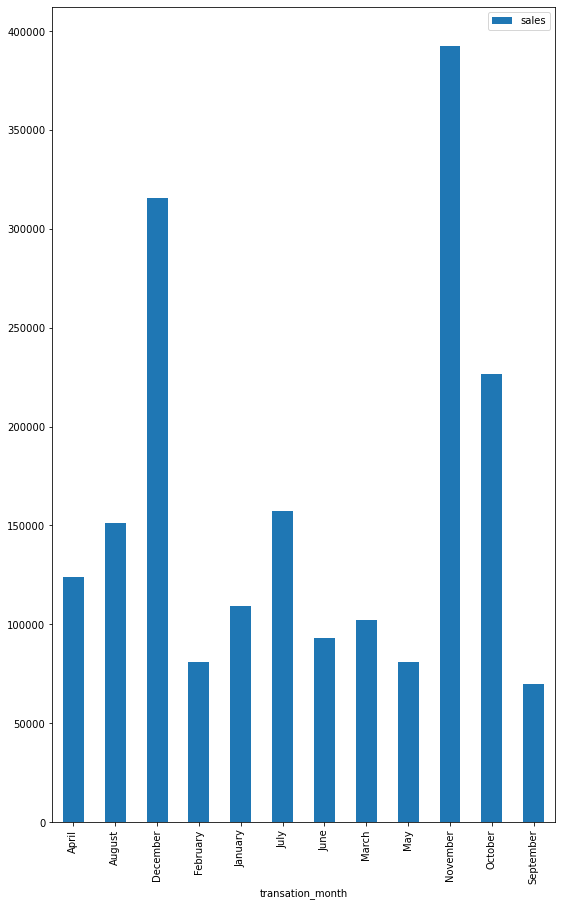

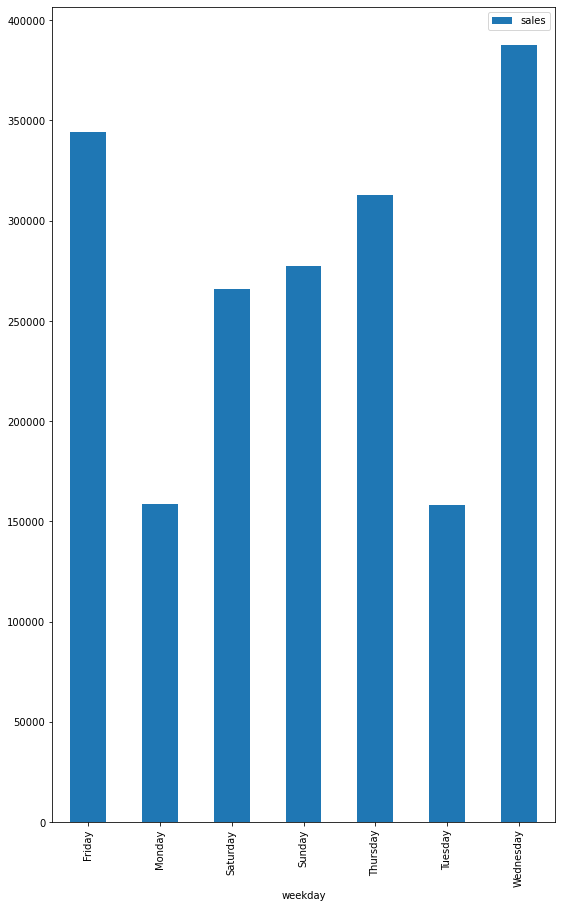

In [714]:
rfm_std_prm_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

rfm_std_prm_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()



In [715]:
rfm_std_prm_cust.product_category.value_counts().head(5)



Apparel      6119
Nest-USA     5493
Office       2229
Nest         1407
Drinkware    1123
Name: product_category, dtype: int64

In [716]:
rfm_std_prm_cust.coupon_status.value_counts()/rfm_std_prm_cust.coupon_status.value_counts().sum()

Clicked    0.51
Used       0.34
Not Used   0.15
Name: coupon_status, dtype: float64

In [717]:
rfm_std_prm_cust.gender.value_counts()/rfm_std_prm_cust.gender.value_counts().sum()

F   0.64
M   0.36
Name: gender, dtype: float64

In [718]:
rfm_std_prm_cust.location.value_counts()

Chicago          7182
California       5829
New York         3689
New Jersey       1608
Washington DC     905
Name: location, dtype: int64

In [719]:
## Stratergy for Premium customer : 
# 1)feb , may and september is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays and tuesday   as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa etc. 

# 3) We should need to aware them more about the coupon_status as most of them are click / not used the coupon. 

# 4) We should traget male customers by marketing specially from the location like california. chicaga and 
# New york as male audience are less and they should be focus to incress the sales. 


<AxesSubplot:xlabel='weekday'>

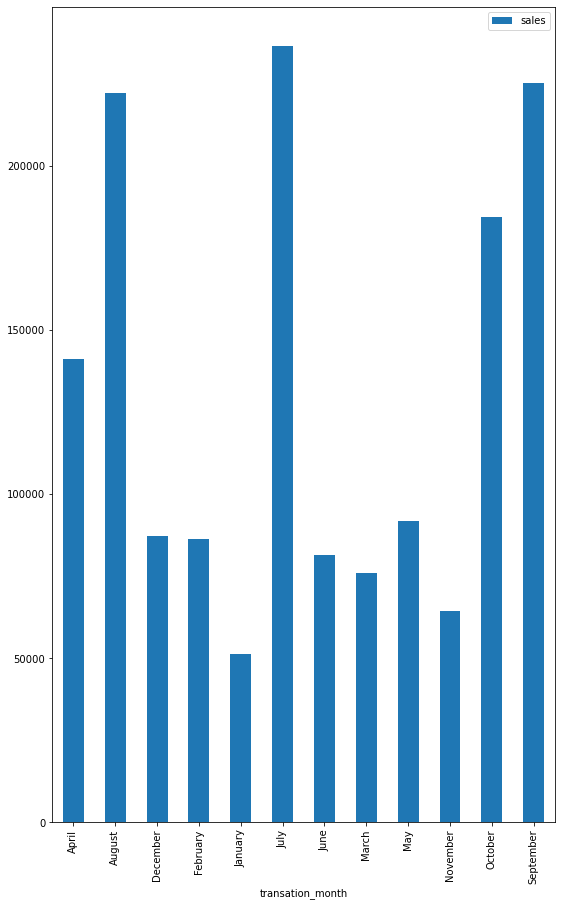

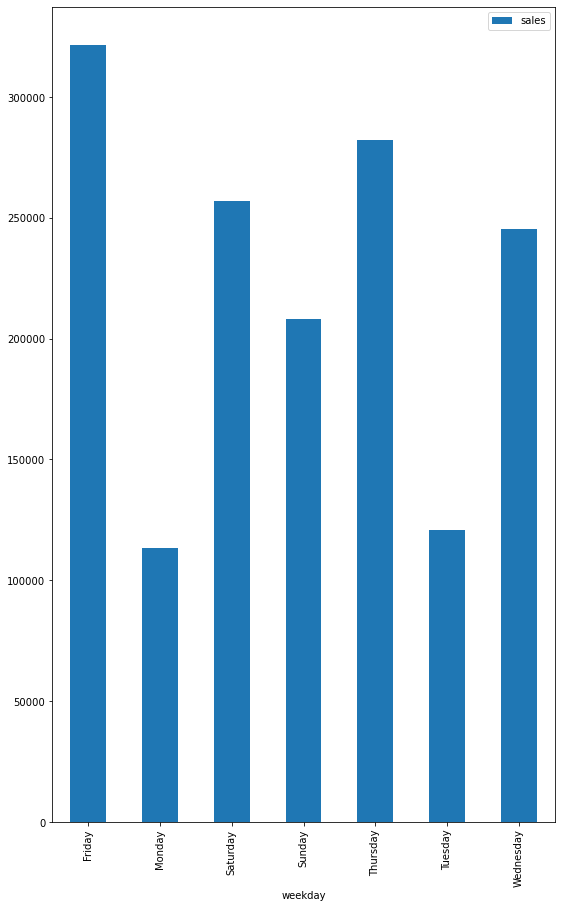

In [720]:
rfm_std_gold_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

rfm_std_gold_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()


In [721]:
rfm_std_gold_cust.product_category.value_counts().head(5)


Apparel      6903
Nest-USA     4584
Office       2172
Drinkware    1281
Lifestyle    1196
Name: product_category, dtype: int64

In [722]:
rfm_std_gold_cust.coupon_status.value_counts()/rfm_std_gold_cust.coupon_status.value_counts().sum()

Clicked    0.51
Used       0.34
Not Used   0.15
Name: coupon_status, dtype: float64

In [723]:
rfm_std_gold_cust.gender.value_counts()/rfm_std_gold_cust.gender.value_counts().sum()

F   0.60
M   0.40
Name: gender, dtype: float64

In [724]:
rfm_std_gold_cust.location.value_counts()

## Stratergy for gold customer : 
# 1) Jan and Nov is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays and tuesday   as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa etc. 

# 3) We should need to aware them more about the coupon_status as most of them are click / not used the coupon. 

# 4) We should traget male customers by marketing specially from the location like california. chicaga and 
# New york as male audience are less and they should be focus to incress the sales. 


Chicago          6961
California       5348
New York         3816
New Jersey       1710
Washington DC    1035
Name: location, dtype: int64

<AxesSubplot:xlabel='weekday'>

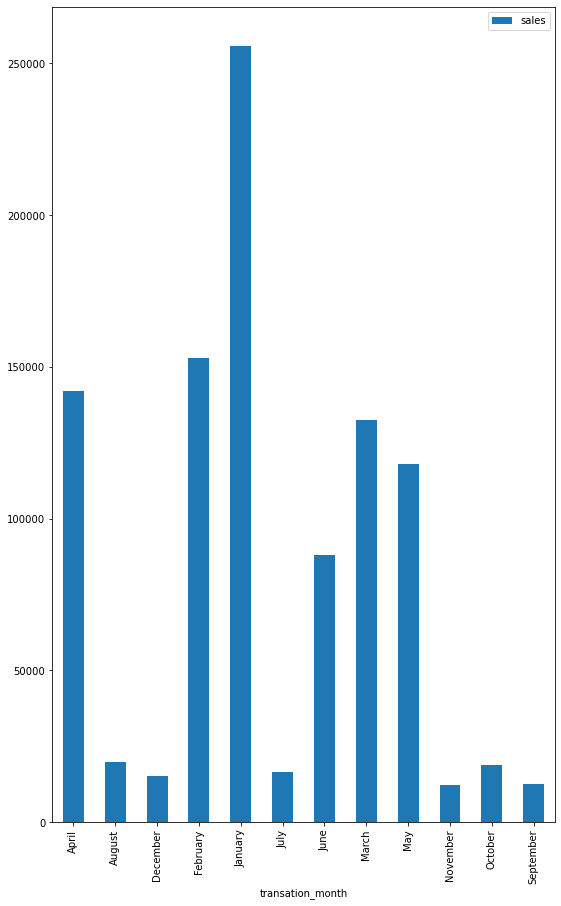

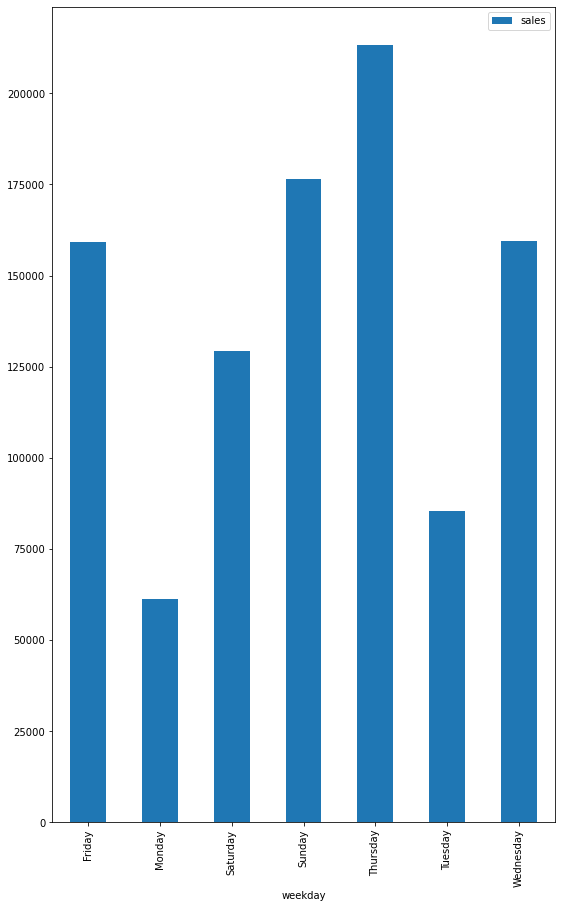

In [725]:
rfm_std__silver_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

rfm_std__silver_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()

In [726]:
rfm_std__silver_cust.product_category.value_counts().head(5)

Apparel      3493
Nest-USA     3154
Office       1529
Drinkware     787
Lifestyle     608
Name: product_category, dtype: int64

In [727]:
rfm_std__silver_cust.coupon_status.value_counts()/rfm_std__silver_cust.coupon_status.value_counts().sum()

Clicked    0.52
Used       0.33
Not Used   0.15
Name: coupon_status, dtype: float64

In [728]:
rfm_std__silver_cust.gender.value_counts()/rfm_std__silver_cust.gender.value_counts().sum()

F   0.62
M   0.38
Name: gender, dtype: float64

In [729]:
rfm_std__silver_cust.location.value_counts()

## Stratergy for silver customer : 
# 1) july to dec  two consecutive quarters is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays and tuesday   as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa etc. 

# 3) We should need to aware them more about the coupon_status as most of them are click / not used the coupon. 

# 4) We should traget male customers by marketing specially from the location like california. chicaga and 
# New york as male audience are less and they should be focus to incress the sales. 


California       3557
Chicago          3142
New York         2719
New Jersey        766
Washington DC     639
Name: location, dtype: int64

<AxesSubplot:xlabel='weekday'>

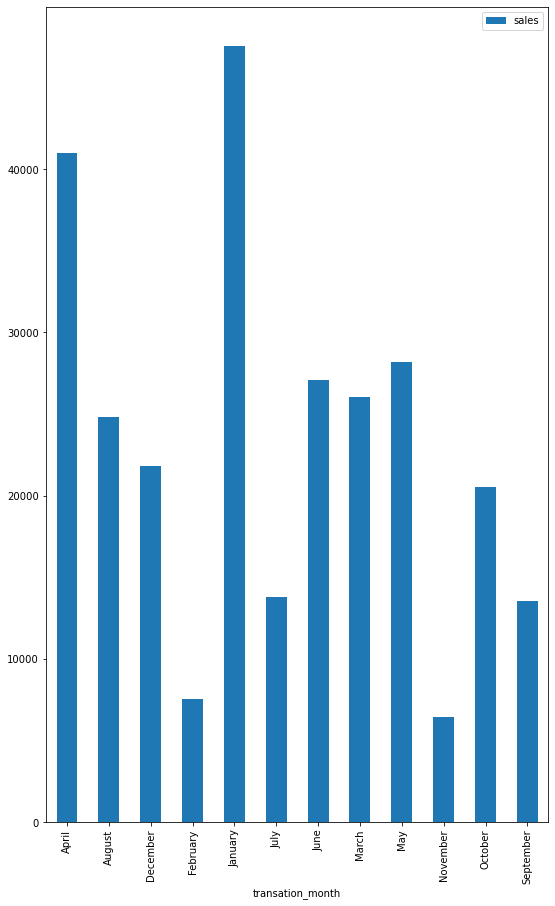

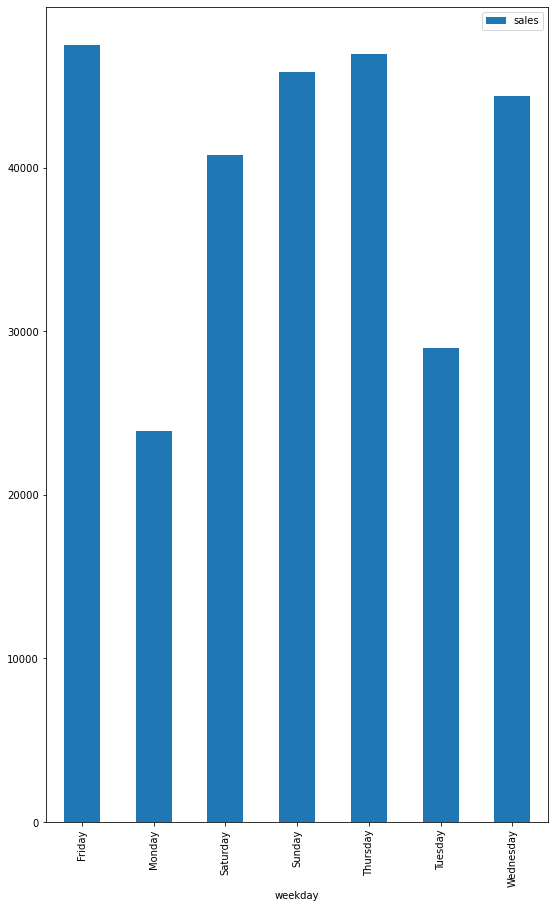

In [730]:
rfm_std_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

rfm_std_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()

In [731]:
rfm_std_cust.product_category.value_counts().head(5)

Apparel      1611
Nest-USA      782
Office        583
Drinkware     292
Lifestyle     275
Name: product_category, dtype: int64

In [732]:
rfm_std_cust.coupon_status.value_counts()/rfm_std_cust.coupon_status.value_counts().sum()

Clicked    0.50
Used       0.34
Not Used   0.16
Name: coupon_status, dtype: float64

In [733]:
rfm_std_cust.gender.value_counts()/rfm_std_cust.gender.value_counts().sum()

F   0.67
M   0.33
Name: gender, dtype: float64

In [734]:
rfm_std_cust.location.value_counts()

## Stratergy for Standard customer : 
# 1) feb and Nov is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays and tuesday   as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa etc. 

# 3) We should need to aware them more about the coupon_status as most of them are click / not used the coupon. 

# 4) We should traget male customers by marketing specially from the location like california. chicaga and 
# New york as male audience are less and they should be focus to incress the sales. 


California       1402
Chicago          1095
New York          949
New Jersey        419
Washington DC     153
Name: location, dtype: int64

## Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [735]:
## For K-mean clustering the pre-requisites are : 
## 1) Treat outliers and missing 
## 2) scaling of data 
## 3) all numerical data 


data_new = data_copy.copy()

In [736]:
## Removing no_numerical, and unique Data: 
data_new.drop(["transation_month", "weekday", "customer_id", "transaction_id", "product_sku","product_description","product_category","quantity", "avg_price", "delivery_charges", "location", "coupon_code", "discount_pct","gst"], axis=1, inplace=True)

In [737]:
data_new

,transation_day,month_n,coupon_status,gender,cust_tenure_months,offline_spend,online_spend,invoice_value
0,1,1,Used,M,12,4500,2424.50,158.67
1,1,1,Used,M,12,4500,2424.50,158.67
2,1,1,Not Used,M,12,4500,2424.50,249.58
3,1,1,Clicked,M,12,4500,2424.50,87.19
4,1,1,Clicked,M,12,4500,2424.50,158.67
...,...,...,...,...,...,...,...,...
52919,26,11,Used,M,22,3000,1642.31,173.66
52920,26,11,Used,M,22,3000,1642.31,89.66
52921,26,11,Clicked,M,22,3000,1642.31,299.66
52922,26,11,Used,M,22,3000,1642.31,507.98


In [738]:
data_new.coupon_status = np.where(data_new.coupon_status == "Used" , 1 , 0)

In [739]:
data_new.gender = np.where(data_new.gender == "M", 1 , 0)

In [740]:
## No missing : 
data_new.isna().sum()

transation_day        0
month_n               0
coupon_status         0
gender                0
cust_tenure_months    0
offline_spend         0
online_spend          0
invoice_value         0
dtype: int64

In [741]:
## checking outliers: 
data_new.describe([.1,.9, .99])

,transation_day,month_n,coupon_status,gender,cust_tenure_months,offline_spend,online_spend,invoice_value
count,52924.00,52924.00,52924.00,52924.00,52924.00,52924.00,52924.00,52924.00
mean,15.72,6.65,0.34,0.38,26.13,2830.91,1893.11,89.08
std,8.76,3.33,0.47,0.48,13.48,936.15,807.01,152.51
min,1.00,1.00,0.00,0.00,2.00,500.00,320.25,4.38
10%,4.00,2.00,0.00,0.00,7.00,1500.00,869.25,10.71
50%,16.00,7.00,0.00,0.00,27.00,3000.00,1837.87,40.68
90%,28.00,11.00,1.00,1.00,44.00,4000.00,2928.55,215.44
99%,31.00,12.00,1.00,1.00,50.00,5000.00,3897.20,509.77
max,31.00,12.00,1.00,1.00,50.00,5000.00,4556.93,8979.27


In [742]:
## Treating outliers : 

data_new.offline_spend[data_new.offline_spend <= 1200] = 1200

data_new.online_spend[data_new.online_spend >= 3897.20] = 3897.20

data_new.invoice_value[data_new.invoice_value >= 215.44] = 215.44

<ipython-input-742-e0dae659c142>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.offline_spend[data_new.offline_spend <= 1200] = 1200
<ipython-input-742-e0dae659c142>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.online_spend[data_new.online_spend >= 3897.20] = 3897.20
<ipython-input-742-e0dae659c142>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.invoice_value[data_new.invoice_value >= 215.44] = 215.44

In [743]:
## Scaling the data : 

In [744]:
scale_data = StandardScaler()

In [745]:
scale_data = scale_data.fit(data_new)

In [746]:
scale_data = pd.DataFrame(scale_data.fit_transform(data_new), columns= data_new.columns)

In [747]:
kmean_3 = KMeans(n_clusters=3 , random_state=123).fit(scale_data)
kmean_4 = KMeans(n_clusters=4 , random_state=123).fit(scale_data)
kmean_5 = KMeans(n_clusters=5 , random_state=123).fit(scale_data)
kmean_6 = KMeans(n_clusters=6 , random_state=123).fit(scale_data)

In [748]:
scale_data["kmean_3"] = kmean_3.labels_
scale_data["kmean_4"] = kmean_4.labels_
scale_data["kmean_5"] = kmean_5.labels_
scale_data["kmean_6"] = kmean_6.labels_

In [ ]:
print ("cluster 3 score : " , silhouette_score(scale_data , labels= kmean_3.labels_))
print ("cluster 4 score : " , silhouette_score(scale_data , labels= kmean_4.labels_))
print ("cluster 5 score : " , silhouette_score(scale_data , labels= kmean_5.labels_))
print ("cluster 6 score : " , silhouette_score(scale_data , labels= kmean_6.labels_))

In [749]:
scale_data.kmean_3.value_counts()/scale_data.kmean_3.sum()

0   0.53
2   0.35
1   0.29
Name: kmean_3, dtype: float64

In [750]:
scale_data.kmean_4.value_counts()/scale_data.kmean_4.sum()

0   0.27
1   0.24
2   0.17
3   0.14
Name: kmean_4, dtype: float64

In [751]:
scale_data.kmean_5.value_counts()/scale_data.kmean_5.sum()

1   0.16
0   0.14
4   0.10
3   0.09
2   0.07
Name: kmean_5, dtype: float64

In [752]:
scale_data.kmean_6.value_counts()/scale_data.kmean_6.sum()

5   0.09
3   0.08
2   0.06
1   0.05
4   0.04
0   0.04
Name: kmean_6, dtype: float64

In [753]:
## By observing the silhouette_score and the observation distribution (best- between 4-40%): 
## i choose cluster 4 as final labels  

In [754]:
data_copy["label"] = kmean_4.labels_

In [755]:
data_copy["label"]  = np.where(data_copy.label==0 , "Standard Customer", np.where(data_copy.label==1, "Silver Customer" , np.where(data_copy.label==2, "Gold Customer", "Premium Customer")))

In [756]:
std_cust = data_copy[data_copy.label ==  "Standard Customer"]

silver_cust = data_copy[data_copy.label ==  "Silver Customer"]

gold_cust = data_copy[data_copy.label ==  "Gold Customer"]

preium_cust = data_copy[data_copy.label ==  "Premium Customer"]

<AxesSubplot:xlabel='weekday'>

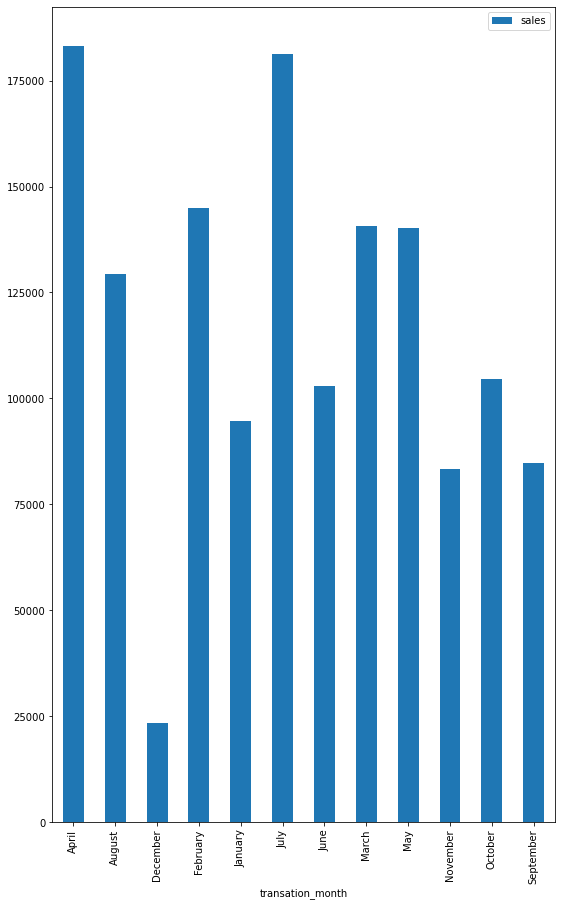

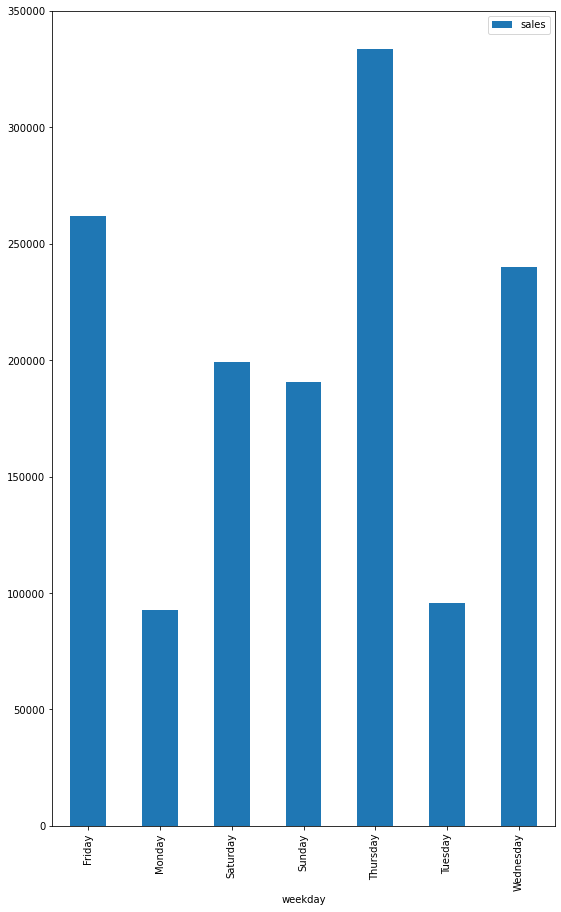

In [757]:
std_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

std_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()



In [758]:
std_cust.product_category.value_counts().head(5)


Apparel      6428
Nest-USA     4093
Office       2300
Drinkware    1230
Lifestyle    1086
Name: product_category, dtype: int64

In [759]:
std_cust.coupon_status.value_counts()/std_cust.coupon_status.value_counts().sum()

Clicked    0.77
Not Used   0.23
Name: coupon_status, dtype: float64

In [760]:
std_cust.gender.value_counts()/std_cust.gender.value_counts().sum()

F   1.00
Name: gender, dtype: float64

In [761]:
std_cust.location.value_counts()

## Stratergy for Standard customer : 
# 1) DEc is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays and tuesday   as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa etc. 

# 3) We should need to aware them more about the coupon_status as all of them are click / not used the coupon. 

# 4) We should try to traget male customers by marketing specially from the location like california. chicaga and 
# New york as there is no male audience to incress the sales. 


Chicago          6046
California       5066
New York         4004
New Jersey       1558
Washington DC     703
Name: location, dtype: int64

<AxesSubplot:xlabel='weekday'>

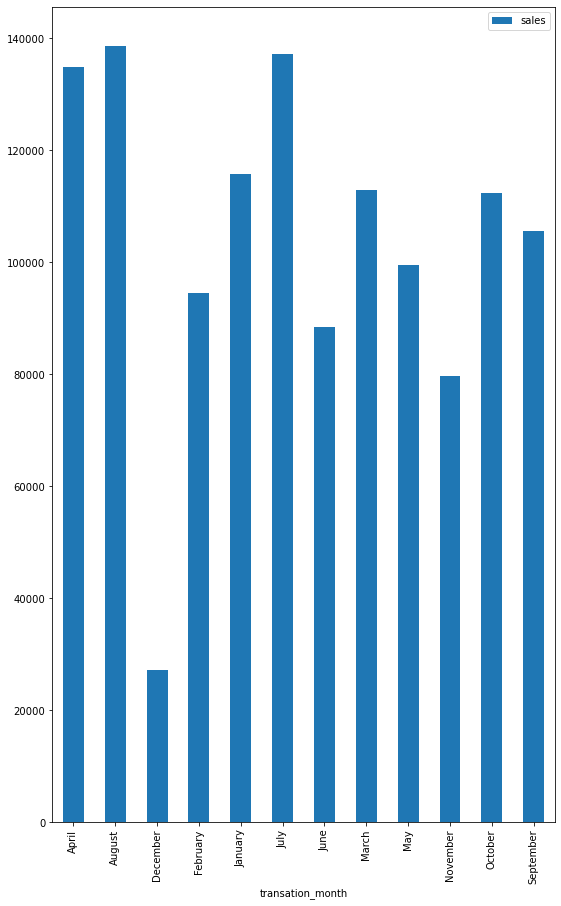

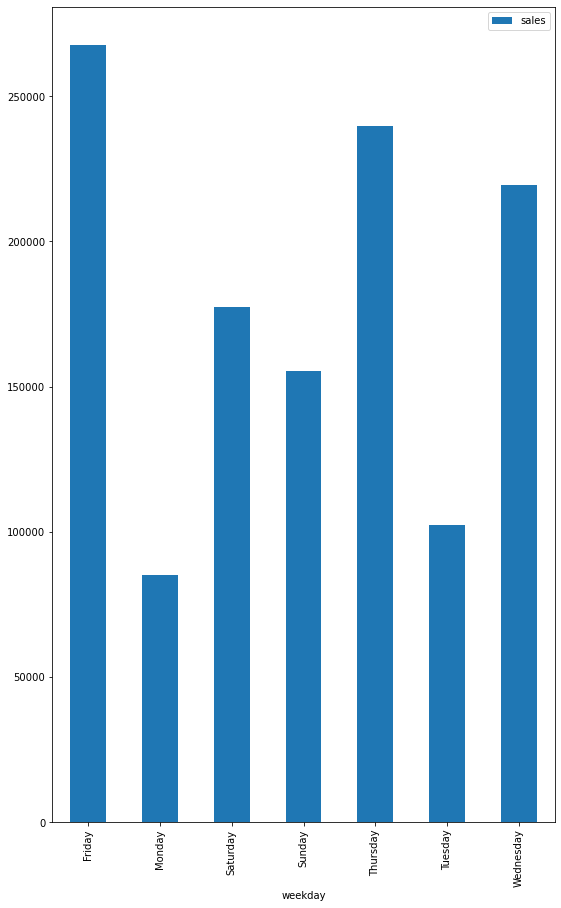

In [762]:
silver_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

silver_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()


In [763]:
silver_cust.product_category.value_counts().head(5)

Apparel      5545
Nest-USA     3701
Office       2026
Drinkware    1046
Lifestyle    1011
Name: product_category, dtype: int64

In [764]:
silver_cust.coupon_status.value_counts()/silver_cust.coupon_status.value_counts().sum()

Used   1.00
Name: coupon_status, dtype: float64

In [765]:
silver_cust.gender.value_counts()/silver_cust.gender.value_counts().sum()

F   0.62
M   0.38
Name: gender, dtype: float64

In [766]:
silver_cust.location.value_counts()

## Stratergy for Silver customer : 
# 1) DEC is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays and tuesday   as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa etc. 

# 3) This category customers are very aware of coupon so, we can offer them with more coupon to increase the sale. 

# 4) We should try to traget male customers by marketing specially from the location like california. chicaga and 
# New york as there is no male audience to incress the sales. 


Chicago          5377
California       4571
New York         3298
New Jersey       1257
Washington DC     825
Name: location, dtype: int64

<AxesSubplot:xlabel='weekday'>

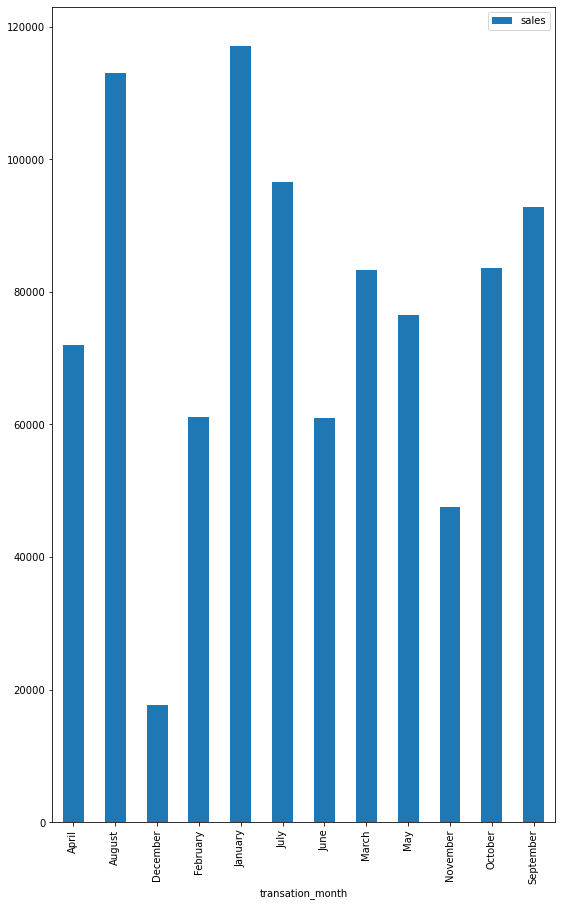

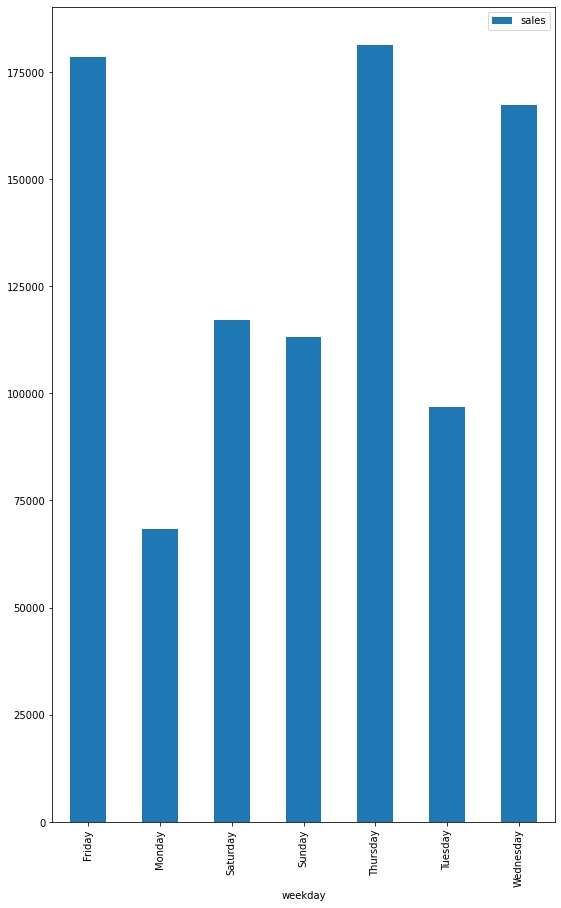

In [767]:
gold_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

gold_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()


In [768]:
gold_cust.product_category.value_counts().head(5)

Apparel      4117
Nest-USA     2783
Office       1325
Drinkware     782
Lifestyle     708
Name: product_category, dtype: int64

In [769]:
gold_cust.coupon_status.value_counts()/std_cust.coupon_status.value_counts().sum()

Clicked    0.50
Not Used   0.15
Name: coupon_status, dtype: float64

In [770]:
gold_cust.gender.value_counts()/std_cust.gender.value_counts().sum()

M   0.65
Name: gender, dtype: float64

In [771]:
gold_cust.location.value_counts()

## Stratergy for gold customer : 
# 1) DEC is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays and tuesday   as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa etc. 

# 3) We should need to aware them more about the coupon_status as all of them are click / not used the coupon. 

# 4) We should try to traget female customers by marketing specially from the location like california. chicaga and 
# New york as there is no male audience to incress the sales. 


Chicago          3987
California       3580
New York         2011
New Jersey        892
Washington DC     825
Name: location, dtype: int64

<AxesSubplot:xlabel='weekday'>

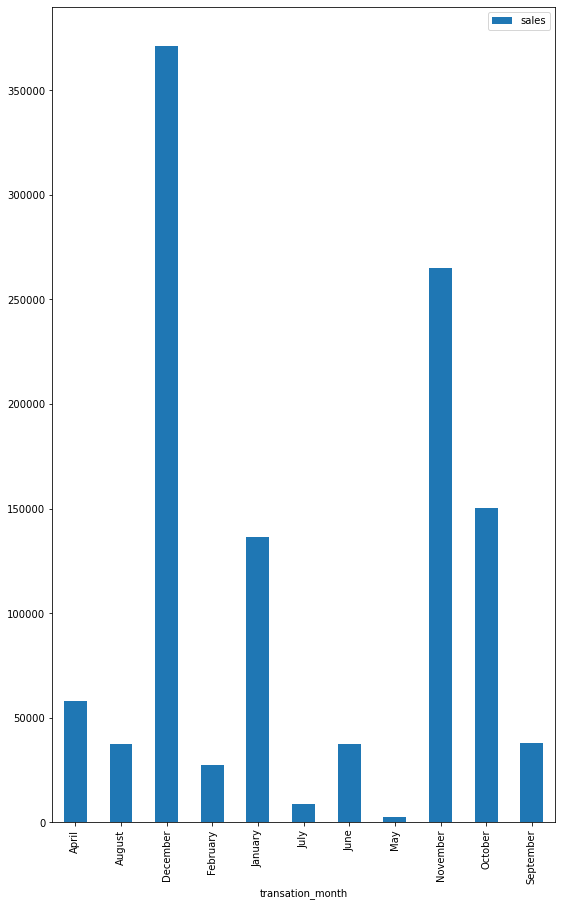

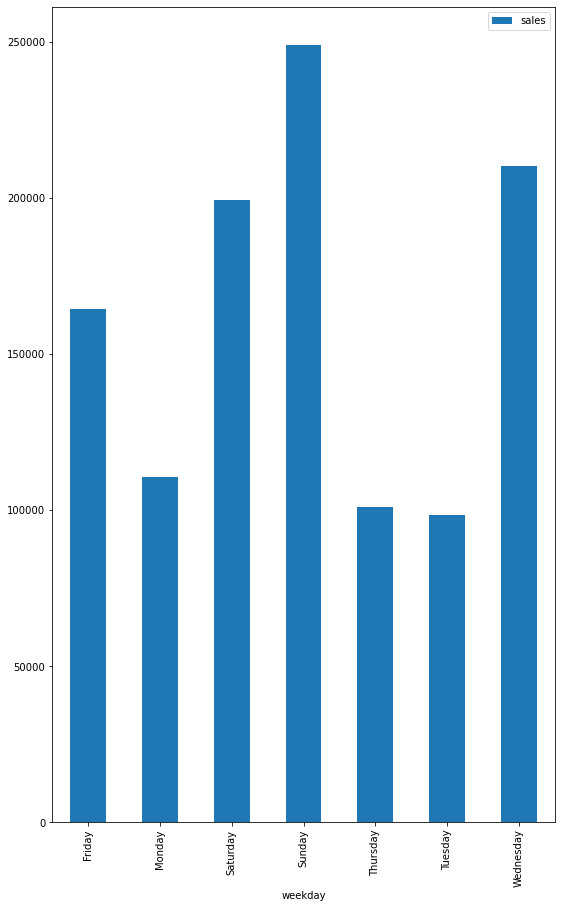

In [772]:
preium_cust.groupby(["transation_month"]).agg(sales = ("invoice_value", "sum")).plot.bar()

preium_cust.groupby(["weekday"]).agg(sales = ("invoice_value", "sum")).plot.bar()


In [773]:
preium_cust.product_category.value_counts().head(5)

Nest-USA     3436
Apparel      2036
Nest         1171
Office        862
Drinkware     425
Name: product_category, dtype: int64

In [774]:
preium_cust.coupon_status.value_counts()/preium_cust.coupon_status.value_counts().sum()

Clicked    0.55
Used       0.29
Not Used   0.17
Name: coupon_status, dtype: float64

In [775]:
preium_cust.gender.value_counts()/preium_cust.gender.value_counts().sum()

F   0.69
M   0.31
Name: gender, dtype: float64

In [776]:
preium_cust.location.value_counts()

## Stratergy for Preium customer : 
# 1) April to september two consecutive quaters  is the least buying period for this category , so we should do some marketing 
# specially during this period to increase the sales.

# 2) We should try to give some more discount on mondays and tuesday   as the sales are the lowest on this days  
# that also on most sold product category that is Apparel, office, Nest-usa etc. 

# 3) We should need to aware them more about the coupon_status as all of them are click / not used the coupon. 

# 4) We should try to traget male customers by marketing specially from the location like california. chicaga and 
# New york as there is no male audience to incress the sales. 


Chicago          2970
California       2919
New York         1860
New Jersey        796
Washington DC     379
Name: location, dtype: int64

## 4.Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

### First define dependent variable with categories low value, medium value, high value using customer revenue.

In [777]:
cust_value = data_copy.groupby(["customer_id"]).agg( value = ("invoice_value", "sum"))

In [778]:
cust_value.reset_index(inplace=True)

In [779]:
pd.qcut(cust_value.value, 3)

0            (6.989, 968.646]
1       (3028.778, 78753.894]
2         (968.646, 3028.778]
3         (968.646, 3028.778]
4         (968.646, 3028.778]
                ...          
1463         (6.989, 968.646]
1464      (968.646, 3028.778]
1465         (6.989, 968.646]
1466         (6.989, 968.646]
1467    (3028.778, 78753.894]
Name: value, Length: 1468, dtype: category
Categories (3, interval[float64]): [(6.989, 968.646] < (968.646, 3028.778] < (3028.778, 78753.894]]

In [780]:
cust_value["life_time_value"]= np.where(cust_value.value<=968.646, "low value", np.where(cust_value.value<=3028.778,"medium value", "high value"))

In [781]:
cust_value

,customer_id,value,life_time_value
0,12346,174.98,low value
1,12347,12090.30,high value
2,12348,1501.93,medium value
3,12350,1183.71,medium value
4,12356,1753.45,medium value
...,...,...,...
1463,18259,816.41,low value
1464,18260,2647.24,medium value
1465,18269,155.66,low value
1466,18277,301.02,low value


In [782]:
cust_value = pd.merge(left=cust_value , right=cust_demo , how="inner", on="customer_id")

In [783]:
trasation_no = data_copy.groupby(["customer_id"]).agg(transation_no = ("transaction_id", "count"))

In [784]:
trasation_no.reset_index(inplace=True)

In [785]:
cust_value = pd.merge(left=cust_value , right=trasation_no , how="inner", on="customer_id")

In [786]:
sale_no_duplicate = sales.iloc[sales.customer_id.drop_duplicates().index]

In [787]:
sale_no_duplicate = sale_no_duplicate[["customer_id", "coupon_status"]]

In [788]:
cust_value = pd.merge(left=cust_value , right=sale_no_duplicate , how="inner", on="customer_id")

In [789]:
cust_value.coupon_status.value_counts()

## Changing the coupon_status data into numerical : 
## clicked = .5 , used = 1 , not_used = 0 

cust_value["coupon_status"]= np.where(cust_value.coupon_status=="Clicked", .5, np.where(cust_value.coupon_status=="Used",1, 0))

## Changing the gender data into numerical : 
## M = 1 , F = 0 

cust_value["gender"]= np.where(cust_value.gender=="M", 1,0)

cust_value.gender.value_counts()

## Model is building on the basis that the location of the new customers will belongs to this above 5 location : 
## Making location a numerical data : 
cust_value["location"]= np.where(cust_value.location=="California",1,np.where(cust_value.location=="Chicago",2,np.where(cust_value.location=="New York", 3,np.where(cust_value.location=="New Jersey",4,5)))) 

In [790]:
cust_value

,customer_id,value,life_time_value,gender,location,cust_tenure_months,transation_no,coupon_status
0,12346,174.98,low value,0,3,31,2,1.00
1,12347,12090.30,high value,1,3,20,60,0.50
2,12348,1501.93,medium value,1,1,39,23,1.00
3,12350,1183.71,medium value,1,1,25,17,0.00
4,12356,1753.45,medium value,0,2,31,36,1.00
...,...,...,...,...,...,...,...,...
1463,18259,816.41,low value,0,1,5,7,0.50
1464,18260,2647.24,medium value,1,3,43,40,0.50
1465,18269,155.66,low value,1,2,25,8,0.00
1466,18277,301.02,low value,0,2,47,1,0.00


## Removed all the variable which are use to drived for invoice value
## And also not inculding marekting expenditure as its from client

## Then perform Classification model

In [791]:
## Data is balance or not : 
cust_value.life_time_value.value_counts()/cust_value.life_time_value.value_counts().sum()

high value     0.33
low value      0.33
medium value   0.33
Name: life_time_value, dtype: float64

In [792]:
cust_value = cust_value[["gender", "location","cust_tenure_months","transation_no","coupon_status", "value","life_time_value"]]

In [793]:
x_var = cust_value[cust_value.columns.difference(["life_time_value"])]

In [794]:
y_var = cust_value.life_time_value

In [795]:
y_var = np.where(y_var=="low value",0,np.where(y_var=="medium value", 1,2))

In [796]:
y_var = pd.Series(y_var)

In [797]:
## Divide data into test-train : 
train_x, test_x , train_y, test_y  = train_test_split(x_var,y_var,test_size=.2, random_state=123)

In [798]:
train_x

,coupon_status,cust_tenure_months,gender,location,transation_no,value
1163,0.50,33,1,1,63,5582.85
984,0.50,40,1,2,14,653.77
1266,0.00,25,0,1,45,4795.15
948,0.50,9,0,1,12,982.23
692,0.50,30,0,2,4,336.91
...,...,...,...,...,...,...
1041,0.50,46,0,2,11,178.67
1122,1.00,7,0,4,14,1748.11
1346,0.50,13,0,1,12,900.18
1406,0.00,7,1,1,28,1795.90


In [799]:
train_y

1163    2
984     0
1266    2
948     1
692     0
       ..
1041    0
1122    1
1346    0
1406    1
1389    0
Length: 1174, dtype: int32

In [800]:
test_x

,coupon_status,cust_tenure_months,gender,location,transation_no,value
42,0.50,2,1,1,15,842.09
76,0.50,26,1,4,58,6359.20
1385,0.50,4,1,1,2,223.35
252,0.50,16,1,4,39,2220.69
388,0.00,11,0,4,7,368.19
...,...,...,...,...,...,...
741,1.00,30,0,1,35,2612.16
582,1.00,26,1,1,1,158.67
1296,0.50,6,0,3,1,98.13
1144,0.50,47,1,1,8,369.27


In [801]:
test_y

42      0
76      2
1385    0
252     1
388     0
       ..
741     1
582     0
1296    0
1144    0
879     2
Length: 294, dtype: int32

In [802]:
param_grid = {"max_depth":[5,6,7,8,9,10],"max_features":[3,4,5,6],"max_leaf_nodes":[8,9,10,11,12,13]}

In [803]:
best_parms = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, n_jobs=-1,scoring='accuracy', verbose=True )

In [804]:
best_parms = best_parms.fit(train_x,train_y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [805]:
best_parms.best_params_

{'max_depth': 6, 'max_features': 5, 'max_leaf_nodes': 11}

In [806]:
dtree_model = DecisionTreeClassifier(max_depth=5, max_features=5, max_leaf_nodes=9)

In [807]:
dtree_model = dtree_model.fit(train_x,train_y)

In [808]:
pre_train = pd.Series(dtree_model.predict(train_x))

In [809]:
pre_test = pd.Series(dtree_model.predict(test_x))

In [810]:
## Train accuracy : 

print("Train_score : ",accuracy_score(train_y, pre_train))

print("Test_score : ",accuracy_score(test_y, pre_test))

Train_score :  1.0
Test_score :  1.0


## 5.Cross-Selling (Which products are selling together)
## You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.


In [811]:
## Useing apriori Algorithum to minimize the product category : 
data_copy

,transation_day,transation_month,month_n,weekday,customer_id,transaction_id,product_sku,product_description,product_category,quantity,...,gender,location,cust_tenure_months,coupon_code,discount_pct,gst,offline_spend,online_spend,invoice_value,label
0,1,January,1,Tuesday,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,158.67,Silver Customer
1,1,January,1,Tuesday,17850,16680,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,158.67,Silver Customer
2,1,January,1,Tuesday,17850,16696,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,249.58,Premium Customer
3,1,January,1,Tuesday,17850,16699,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,87.19,Gold Customer
4,1,January,1,Tuesday,17850,16700,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,M,Chicago,12,ELEC10,10.00,0.10,4500,2424.50,158.67,Gold Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,26,November,11,Tuesday,14502,44690,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,...,M,Chicago,22,NE20,20.00,0.05,3000,1642.31,173.66,Silver Customer
52920,26,November,11,Tuesday,14502,44694,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,...,M,Chicago,22,NE20,20.00,0.05,3000,1642.31,89.66,Silver Customer
52921,26,November,11,Tuesday,14502,44695,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,...,M,Chicago,22,NE20,20.00,0.05,3000,1642.31,299.66,Gold Customer
52922,26,November,11,Tuesday,14502,44696,GGOENEBQ086499,Nest Cam IQ - USA,Nest,3,...,M,Chicago,22,NE20,20.00,0.05,3000,1642.31,507.98,Silver Customer


In [812]:
data_copy.product_category.value_counts()[0:7].index

Index(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Nest',
       'Bags'],
      dtype='object')

In [813]:
## As we can see the total transation are 52924 so removing products which are haveing transation lower than 1000:


In [814]:
data_copy_final_product = data_copy[(data_copy.product_category=='Apparel')|(data_copy.product_category=='Nest-USA')|(data_copy.product_category=='Office')|(data_copy.product_category=='Drinkware')|(data_copy.product_category=='Lifestyle')|(data_copy.product_category=='Nest')|(data_copy.product_category=='Bags')]

In [815]:
data_copy_final_product.product_category.value_counts()

Apparel      18126
Nest-USA     14013
Office        6513
Drinkware     3483
Lifestyle     3092
Nest          2198
Bags          1882
Name: product_category, dtype: int64

In [816]:
product_data = data_copy[["customer_id", "product_category"]]

In [817]:
#To keeping data set is small, Filtering the data for only one country - France
basket = pd.crosstab(index=product_data.customer_id, columns=product_data.product_category)

In [818]:
#we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1 

In [819]:
basket_sets = basket.applymap(encode_units)

In [820]:
basket_sets

product_category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
customer_id,,,,,,,,,,,,,,,,,,,,
12346,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12347,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
12348,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
12350,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
12356,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
18260,1,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,1,1
18269,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [821]:
frequent_itemsets = apriori(basket_sets, min_support= 0.5 , use_colnames=True)

In [822]:
frequent_itemsets

,support,itemsets
0,0.90,(Apparel)
1,0.63,(Drinkware)
2,0.56,(Lifestyle)
3,0.86,(Nest-USA)
4,0.75,(Office)
5,0.60,"(Apparel, Drinkware)"
6,0.53,"(Lifestyle, Apparel)"
7,0.79,"(Apparel, Nest-USA)"
8,0.71,"(Office, Apparel)"
9,0.58,"(Drinkware, Nest-USA)"


In [823]:
frequent_itemsets.sort_values(by="support", inplace=True)

In [824]:
product_com = association_rules(frequent_itemsets , metric='confidence', min_threshold=0.8)

In [825]:
product_com.sort_values(by="confidence", ascending=False, inplace=True)

In [826]:
product_com

## cross selling ranking as the product which are buying together : 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"(Lifestyle, Nest-USA)",(Apparel),0.51,0.90,0.50,0.98,1.08,0.04,4.15
5,"(Office, Drinkware, Nest-USA)",(Apparel),0.52,0.90,0.51,0.98,1.08,0.04,4.00
16,"(Office, Drinkware)",(Apparel),0.55,0.90,0.54,0.97,1.08,0.04,3.34
21,"(Drinkware, Nest-USA)",(Apparel),0.58,0.90,0.56,0.97,1.07,0.04,3.11
26,"(Office, Nest-USA)",(Apparel),0.69,0.90,0.66,0.97,1.07,0.04,2.84
15,(Lifestyle),(Apparel),0.56,0.90,0.53,0.95,1.06,0.03,2.12
24,(Drinkware),(Apparel),0.63,0.90,0.60,0.95,1.06,0.03,2.11
4,"(Office, Apparel, Drinkware)",(Nest-USA),0.54,0.86,0.51,0.95,1.11,0.05,3.02
30,(Office),(Apparel),0.75,0.90,0.71,0.95,1.05,0.04,1.91
12,"(Office, Drinkware)",(Nest-USA),0.55,0.86,0.52,0.95,1.10,0.05,2.74


## 6.	Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

### For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [827]:
data_month = data_copy.groupby(["transation_month","customer_id"]).agg(avg_day = ("transation_day", np.average))

In [828]:
data_month.reset_index(inplace=True)

In [829]:
data_month= data_month[data_month.customer_id.duplicated()]

In [830]:
data_month = data_month.groupby(["customer_id"]).agg(avg_day = ("avg_day", np.average))

In [831]:
data_month.reset_index(inplace=True)

In [832]:
pd.qcut(data_month.avg_day,4)

0       (0.999, 11.0]
1      (16.833, 22.0]
2        (22.0, 31.0]
3      (16.833, 22.0]
4      (16.833, 22.0]
            ...      
575    (11.0, 16.833]
576      (22.0, 31.0]
577    (11.0, 16.833]
578    (16.833, 22.0]
579     (0.999, 11.0]
Name: avg_day, Length: 580, dtype: category
Categories (4, interval[float64]): [(0.999, 11.0] < (11.0, 16.833] < (16.833, 22.0] < (22.0, 31.0]]

In [833]:
data_month.avg_day = np.where(data_month.avg_day<=11.0 , "0-11 day",np.where(data_month.avg_day<=16.833 , "11-17 day",np.where(data_month.avg_day<=22.0 , "17-22 day", "22+ day" )))     

In [834]:
data_month

,customer_id,avg_day
0,12347,0-11 day
1,12348,17-22 day
2,12370,22+ day
3,12377,17-22 day
4,12383,17-22 day
...,...,...
575,18239,11-17 day
576,18245,22+ day
577,18260,11-17 day
578,18269,17-22 day


In [835]:
cust_coup = sales[["customer_id", "coupon_status"]]

In [836]:
cust_coup = cust_coup.loc[cust_coup.customer_id.drop_duplicates().index]

In [837]:
data_month = pd.merge(left=data_month , right=cust_coup , how='left', on="customer_id")

In [838]:
value = data_copy.groupby(["customer_id"]).agg(value = ("invoice_value", "sum"))

In [839]:
value.reset_index(inplace=True)

In [840]:
data_month= pd.merge(left=data_month , right=value , how='left', on="customer_id")

In [841]:
data_month = pd.merge(left=data_month , right=cust_demo , how='left', on="customer_id")

In [842]:
data_month

,customer_id,avg_day,coupon_status,value,gender,location,cust_tenure_months
0,12347,0-11 day,Clicked,12090.30,M,New York,20
1,12348,17-22 day,Used,1501.93,M,California,39
2,12370,22+ day,Used,6750.00,F,New York,21
3,12377,17-22 day,Used,9848.12,F,California,27
4,12383,17-22 day,Not Used,5478.61,M,New York,32
...,...,...,...,...,...,...,...
575,18239,11-17 day,Clicked,6383.23,M,New York,20
576,18245,22+ day,Clicked,7450.13,F,Washington DC,5
577,18260,11-17 day,Clicked,2647.24,M,New York,43
578,18269,17-22 day,Not Used,155.66,M,Chicago,25


In [843]:
## Changing the coupon_status data into numerical : 
## clicked = .5 , used = 1 , not_used = 0 

data_month.coupon_status= np.where(data_month.coupon_status=="Clicked", .5, np.where(data_month.coupon_status=="Used",1, 0))

## Changing the gender data into numerical : 
## M = 1 , F = 0 

data_month.gender= np.where(data_month.gender=="M", 1,0)

cust_value.gender.value_counts()

## Model is building on the basis that the location of the new customers will belongs to this above 5 location : 
## Making location a numerical data : 
data_month.location= np.where(data_month.location=="California",1,np.where(data_month.location=="Chicago",2,np.where(data_month.location=="New York", 3,np.where(data_month.location=="New Jersey",4,5)))) 

In [844]:
data_month = data_month[['gender','location', 'cust_tenure_months','coupon_status', 'value','avg_day']]

In [845]:
data_month

,gender,location,cust_tenure_months,coupon_status,value,avg_day
0,1,3,20,0.50,12090.30,0-11 day
1,1,1,39,1.00,1501.93,17-22 day
2,0,3,21,1.00,6750.00,22+ day
3,0,1,27,1.00,9848.12,17-22 day
4,1,3,32,0.00,5478.61,17-22 day
...,...,...,...,...,...,...
575,1,3,20,0.50,6383.23,11-17 day
576,0,5,5,0.50,7450.13,22+ day
577,1,3,43,0.50,2647.24,11-17 day
578,1,2,25,0.00,155.66,17-22 day


In [846]:
## Building model : 

In [847]:
## Data is balance or not : 
data_month.avg_day.value_counts()/data_month.avg_day.value_counts().sum()

17-22 day   0.28
0-11 day    0.26
11-17 day   0.24
22+ day     0.22
Name: avg_day, dtype: float64

In [848]:
y = data_month.avg_day

In [849]:
x = data_month[data_month.columns.difference(["avg_day"])]

In [850]:
y = pd.Series(np.where(y=="0-11 day",0,np.where(y=="11-17 day",1 , np.where(y=="17-22 day",2,3))))

In [851]:
y.value_counts()/y.value_counts().sum()

2   0.28
0   0.26
1   0.24
3   0.22
dtype: float64

In [852]:
sm = SMOTE(random_state=420)

In [853]:
x_new, y_new = sm.fit_resample(x.values, y.values)

In [854]:
x_new= pd.DataFrame(x_new, columns= x.columns)

y_new = pd.DataFrame(y_new, columns=["avg_day"])

y_new.value_counts()

avg_day
0          161
1          161
2          161
3          161
dtype: int64

In [855]:
x_new

,coupon_status,cust_tenure_months,gender,location,value
0,0.50,20.00,1.00,3.00,12090.30
1,1.00,39.00,1.00,1.00,1501.93
2,1.00,21.00,0.00,3.00,6750.00
3,1.00,27.00,0.00,1.00,9848.12
4,0.00,32.00,1.00,3.00,5478.61
...,...,...,...,...,...
639,0.93,28.21,0.00,1.07,2515.99
640,0.81,27.28,0.38,3.62,5651.47
641,0.29,30.48,0.00,1.41,542.99
642,0.50,10.61,1.00,2.40,398.33


In [856]:
y_new

,avg_day
0,0
1,2
2,3
3,2
4,2
...,...
639,3
640,3
641,3
642,3


In [857]:
x_new.coupon_status = pd.Series(np.where(x_new.coupon_status<=.25, 0, np.where(x_new.coupon_status>=.75,1,0.5)))

In [858]:
x_new.gender = pd.Series(np.where(x_new.gender<=0.5,0,1))

In [859]:
x_new.location = pd.Series(np.where(x_new.location<=1.5,1,np.where(x_new.location<=2.5,2,np.where(x_new.location<=3.5,3,np.where(x_new.location<=4.5,4,5)))))

In [860]:
x_new

,coupon_status,cust_tenure_months,gender,location,value
0,0.50,20.00,1,3,12090.30
1,1.00,39.00,1,1,1501.93
2,1.00,21.00,0,3,6750.00
3,1.00,27.00,0,1,9848.12
4,0.00,32.00,1,3,5478.61
...,...,...,...,...,...
639,1.00,28.21,0,1,2515.99
640,1.00,27.28,0,4,5651.47
641,0.50,30.48,0,1,542.99
642,0.50,10.61,1,2,398.33


In [861]:
## Divide data into test-train : 
train_new_x, test_new_x , train_new_y, test_new_y  = train_test_split(x_new,y_new, test_size=.2, random_state=123)

In [862]:
train_new_x

,coupon_status,cust_tenure_months,gender,location,value
227,1.00,4.00,0,5,1028.40
170,0.50,5.00,0,3,11205.00
414,0.50,26.00,0,2,8774.87
398,0.00,15.00,1,3,1605.51
593,1.00,22.87,0,4,1398.60
...,...,...,...,...,...
98,1.00,25.00,1,2,20447.96
322,0.00,22.00,1,1,76.78
382,0.00,49.00,0,3,87.32
365,0.50,9.00,0,1,2421.09


In [863]:
train_new_y

,avg_day
227,2
170,2
414,2
398,3
593,1
...,...
98,1
322,2
382,0
365,0


In [864]:
param_grid = {"max_depth":[5,6,7,8,9,10],"max_features":[2,3,4,5],"max_leaf_nodes":[8,9,10,11,12,13]}

In [865]:
best_parms = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, n_jobs=-1, scoring='accuracy', verbose=True )

In [866]:
best_parms = best_parms.fit(train_new_x,train_new_y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [867]:
best_parms.best_params_

{'max_depth': 7, 'max_features': 3, 'max_leaf_nodes': 13}

In [868]:
dtree_model = DecisionTreeClassifier(max_depth=7, max_features=4 , max_leaf_nodes=13)

In [869]:
dtree_model = dtree_model.fit(train_new_x,train_new_y)

pre_train = pd.Series(dtree_model.predict(train_new_x))

pre_test = pd.Series(dtree_model.predict(test_new_x))

In [870]:
## Train-Test accuracy : 

print("Train_score : ",accuracy_score(train_new_y, pre_train))

print("Test_score : ",accuracy_score(test_new_y, pre_test))

Train_score :  0.39029126213592236
Test_score :  0.3333333333333333


# 7.Perform cohort analysis by defining below cohorts

## Customers who started in each month and understand their behaviour


In [871]:
df = sales[["transation_date_new","customer_id","transaction_id","quantity","avg_price"]]

In [872]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transation_date_new  52924 non-null  datetime64[ns]
 1   customer_id          52924 non-null  int64         
 2   transaction_id       52924 non-null  int64         
 3   quantity             52924 non-null  int64         
 4   avg_price            52924 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.0 MB


In [873]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [874]:
df['InvoiceMonth'] = df['transation_date_new'].apply(get_month)
df['CohortMonth'] = df.groupby('customer_id')['InvoiceMonth'].transform('min')

<ipython-input-874-d2bb1b5b5457>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['transation_date_new'].apply(get_month)
<ipython-input-874-d2bb1b5b5457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = df.groupby('customer_id')['InvoiceMonth'].transform('min')


In [875]:
df

,transation_date_new,customer_id,transaction_id,quantity,avg_price,InvoiceMonth,CohortMonth
0,2019-01-01,17850,16679,1,153.71,2019-01-01,2019-01-01
1,2019-01-01,17850,16680,1,153.71,2019-01-01,2019-01-01
2,2019-01-01,17850,16681,1,2.05,2019-01-01,2019-01-01
3,2019-01-01,17850,16682,5,17.53,2019-01-01,2019-01-01
4,2019-01-01,17850,16682,1,16.50,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...
52919,2019-12-31,14410,48493,1,121.30,2019-12-01,2019-12-01
52920,2019-12-31,14410,48494,1,48.92,2019-12-01,2019-12-01
52921,2019-12-31,14410,48495,1,151.88,2019-12-01,2019-12-01
52922,2019-12-31,14600,48496,5,80.52,2019-12-01,2019-12-01


In [876]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [877]:
invoice_year, invoice_month, _ = get_date(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date(df, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
df['CohortIndex'] = year_diff * 12 + month_diff + 1

<ipython-input-877-122fdd494ae1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = year_diff * 12 + month_diff + 1


In [878]:
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['customer_id'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',columns = 'CohortIndex',values = 'customer_id')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,215.00,13.00,24.00,34.00,23.00,44.00,35.00,47.00,23.00,28.00,20.00,34.00
2019-02-01,96.00,7.00,9.00,16.00,17.00,22.00,19.00,15.00,12.00,11.00,16.00,NaN
2019-03-01,177.00,18.00,35.00,25.00,32.00,33.00,22.00,22.00,15.00,19.00,NaN,NaN
2019-04-01,163.00,14.00,24.00,24.00,18.00,15.00,10.00,16.00,12.00,NaN,NaN,NaN
2019-05-01,112.00,12.00,9.00,13.00,10.00,13.00,14.00,8.00,NaN,NaN,NaN,NaN
2019-06-01,137.00,20.00,22.00,12.00,11.00,14.00,11.00,NaN,NaN,NaN,NaN,NaN
2019-07-01,94.00,13.00,4.00,6.00,11.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,135.00,14.00,15.00,10.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,78.00,6.00,3.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [879]:
cohort_count.index = cohort_count.index.strftime("%B %Y")

<AxesSubplot:title={'center':'Cohort Analysis - Retention Rate'}, xlabel='CohortIndex', ylabel='CohortMonth'>

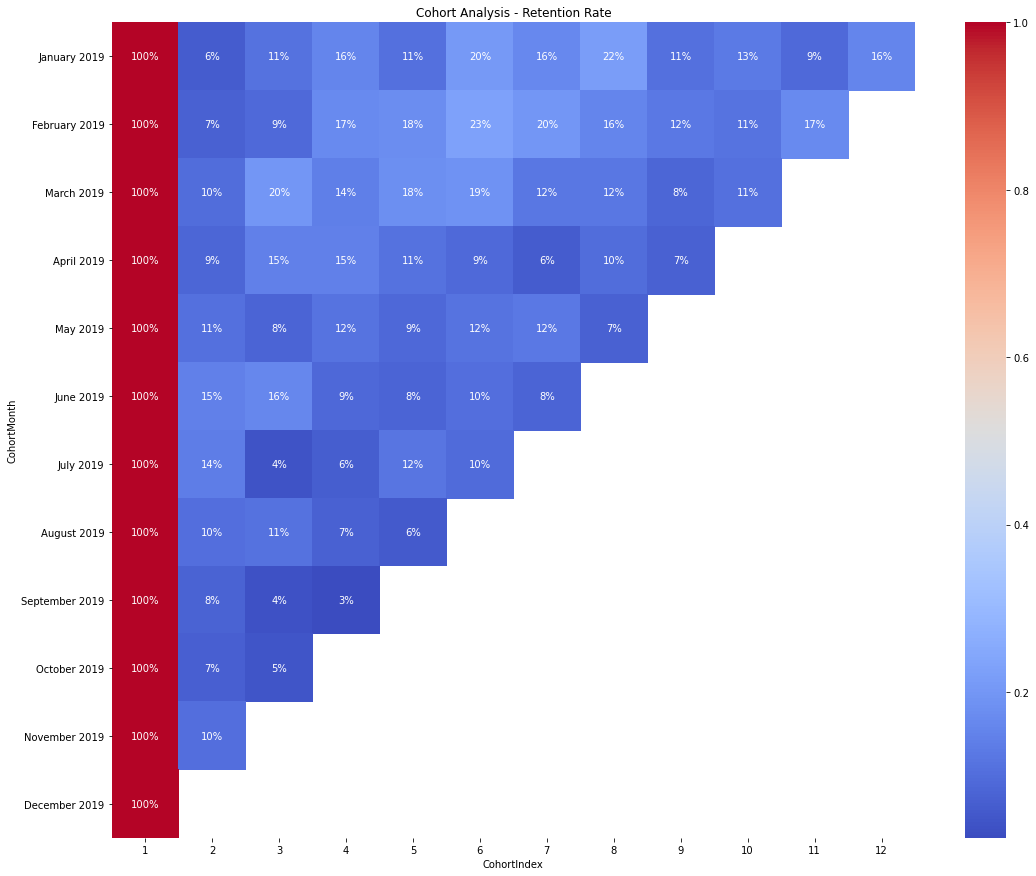

In [892]:
## Cohort table with percentage : 
cohort_count = cohort_count.divide(cohort_count.iloc[:,0], axis = 0)
plt.figure(figsize=(18,15))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(cohort_count, annot=True, cmap="coolwarm", fmt='.0%')

##From the heatmap below , the first column in the chart is active user number on that specific month, and the following 
##columns show how the many remaining users are still doing the transationson the second, third, and fourth month.

## And we can say that there is a significante drop in retention rate from all months customers , Feburary 2019 started customers 
## Have max retention. 

## Also, in the second month there is a significante drop in customers no. 

In [881]:
## Cohort: Average Quantity Sold:

In [882]:
cohort_data2 = df.groupby(['CohortMonth', 'CohortIndex'])['quantity'].mean().reset_index()
average_quantity  = cohort_data2.pivot_table(index = 'CohortMonth',
                                            columns = 'CohortIndex',
                                       values = 'quantity').round(1)
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,5.00,4.20,4.30,11.00,3.40,4.10,4.70,5.50,5.00,5.00,3.60,3.00
2019-02-01,5.20,3.40,6.10,3.80,6.50,3.70,3.00,3.70,3.50,2.70,1.60,NaN
2019-03-01,4.90,6.80,4.70,8.30,4.80,6.40,4.10,3.50,2.70,3.30,NaN,NaN
2019-04-01,4.70,4.60,4.00,2.70,6.00,4.00,5.10,5.20,2.80,NaN,NaN,NaN
2019-05-01,4.10,2.40,3.50,4.20,2.00,3.70,5.10,1.50,NaN,NaN,NaN,NaN
2019-06-01,5.10,3.20,5.80,3.40,4.50,3.30,1.50,NaN,NaN,NaN,NaN,NaN
2019-07-01,4.80,2.20,2.30,2.10,1.80,1.60,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,3.80,2.80,4.30,3.50,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,5.30,3.70,1.30,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [883]:
average_quantity.index = average_quantity.index.strftime("%B %Y")

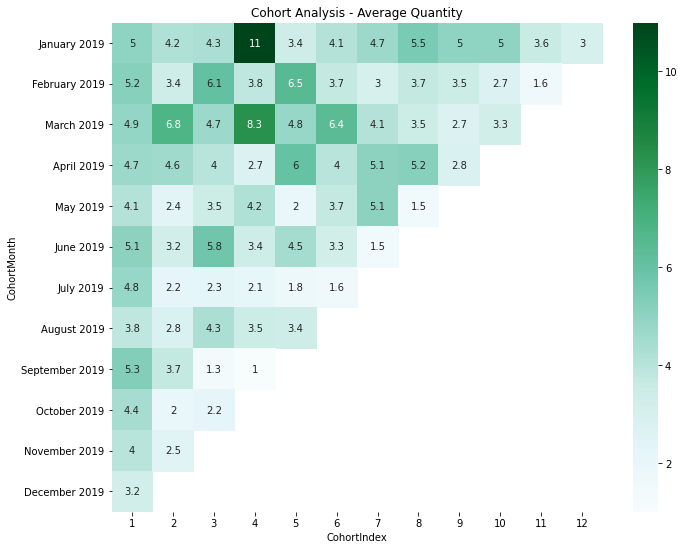

In [884]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, annot = True, cmap = "BuGn")
plt.show()

In [885]:
##It is observed that within the recent cohort/month, the average quantity of the transation was facing a decline. 
##It is a warning signal that users stop  buyingfrom the E-Commerce Company . The reason needs further investigation.


## only jan, feb and march shows some increase of avg quantity for a certain month only.

In [886]:
##  Cohort: Average Sales:

In [887]:
df['avg_sales'] = df['quantity'] * df['avg_price']
cohort_data3 = df.groupby(['CohortMonth', 'CohortIndex'])['avg_sales'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'CohortMonth',
                                           columns = 'CohortIndex',
                                      values = 'avg_sales').round(1)
average_sales

<ipython-input-887-47620c6c604e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_sales'] = df['quantity'] * df['avg_price']


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,99.30,89.80,75.20,148.90,64.60,67.00,81.50,66.30,76.80,97.10,128.60,124.50
2019-02-01,95.40,56.60,79.40,61.10,73.50,59.60,57.70,85.90,98.00,134.20,121.90,NaN
2019-03-01,82.30,110.40,71.40,91.60,77.90,87.80,86.30,116.20,102.70,109.60,NaN,NaN
2019-04-01,81.90,99.30,74.80,69.00,79.90,105.80,110.60,154.30,109.50,NaN,NaN,NaN
2019-05-01,65.30,76.40,63.60,50.40,105.30,84.20,147.40,101.40,NaN,NaN,NaN,NaN
2019-06-01,78.10,46.30,59.10,71.70,67.30,110.60,97.90,NaN,NaN,NaN,NaN,NaN
2019-07-01,71.40,61.20,81.50,84.10,166.90,126.70,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,60.70,119.10,93.10,135.90,146.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,79.60,98.70,98.30,110.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [888]:
average_sales.index = average_sales.index.strftime("%B %Y")

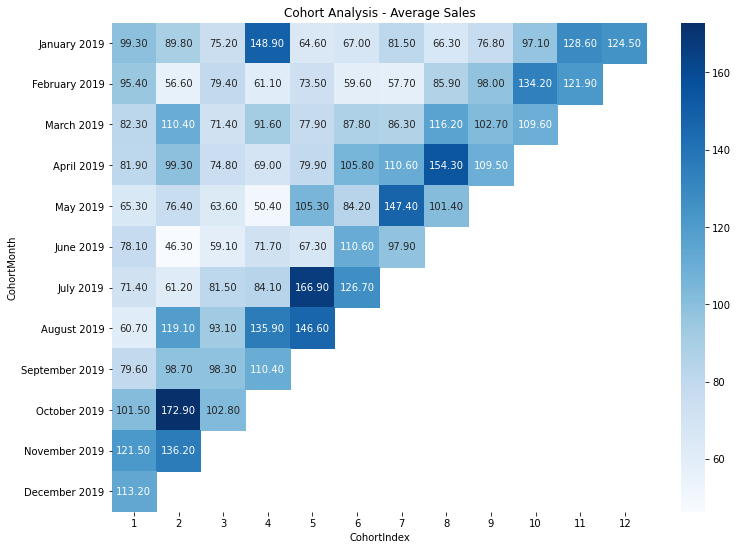

In [889]:
plt.figure(figsize = (12,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, annot = True, cmap = "Blues", fmt='.2f')
plt.show()

In [890]:
## We can say that avg_sales is have a positive trend as its increaseing over the period. 

## Which Month cohort has maximum retention?

In [891]:
## Feb is the cohort with maximum retention 